# Исследование объявлений о продаже квартир

Исходные данные — архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Часть данных сформированы пользователемя, другая часть — получены автоматически на основе картографических данных.

Задача - установить параметры для определения рыночной стоимости объектов недвижимости.

## Оглавление

* [Шаг 1. Откройте файл с данными и изучите общую информацию.](#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию.)
    * [Выводы (шаг 1)](#Выводы-(шаг-1))
* [Шаг 2. Предобработка данных](#Шаг-2.-Предобработка-данных)
    * [Переименование столбцов](#Переименование-столбцов)
    * [Проверка на пропуски и аномалии, изменение типов данных](#Проверка-на-пропуски-и-аномалии,-изменение-типов-данных)
    * [Выводы (шаг 2)](#Выводы-(шаг-2))
* [Шаг 3. Посчитайте и добавьте в таблицу](#Шаг-3.-Посчитайте-и-добавьте-в-таблицу)
    * [Цена квадратного метра](#Цена-квадратного-метра)
    * [День недели, месяц и год публикации объявления](#День-недели,-месяц-и-год-публикации-объявления)
    * [Этаж квартиры (варианты — первый, последний, другой)](#Этаж-квартиры-(варианты-—-первый,-последний,-другой))
    * [Cоотношение жилой и общей площади](#Cоотношение-жилой-и-общей-площади)
    * [Отношение площади кухни к общей](#Отношение-площади-кухни-к-общей)
    * [Выводы (шаг 3)](#Выводы-(шаг-3))
* [Шаг 4. Проведите исследовательский анализ данных и выполните инструкции](#Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции)
    * [Анализ площади, цены, числа комнат и высоты потолков](#Анализ-площади,-цены,-числа-комнат-и-высоты-потолков)
    * [Анализ времени продажи квартиры](#Анализ-времени-продажи-квартиры)
    * [Удаление редких и выбивающихся значений](#Удаление-редких-и-выбивающихся-значений)
    * [Исследование цены квартир](#Исследование-цены-квартир)
    * [Определение центра города](#Определение-центра-города)
    * [Анализ квартир в центре города](#Анализ-квартир-в-центре-города)
    * [Выводы (шаг 4)](#Выводы-(шаг-4))
* [Шаг 5. Общий вывод](#Шаг-5.-Общий-вывод)

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импорт библиотеки pandas
import pandas as pd

In [2]:
# Чтение данных в переменную data
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# Вывод основной информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Вывод основных статистических показателей данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# Вывод первой половины столбцов
data.loc[0:4, 'total_images': 'studio']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False


In [6]:
# Вывод второй половины столбцов
data.loc[0:4, 'open_plan' : ]

,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Выводы (шаг 1)

Файл с данным содержит 22 столбца (2 булевых, 3 целочисленных, 14 столбцов с плавающей точкой и 3 столбца с объектами) и 23699 записей.

Большинство названий столбцов выглядят адекватно и не содержат изъянов, но столбцы cityCenters_nearest, parks_around3000, ponds_around3000 и is_apartment имеют названия, несколько выбивающиеся из стандартного стиля.

В 14 из 22 столбцов есть пропущенные значения.

Вывод первых строк столбцов был разбит на 2 части, так как при выводе методом head() отображаются не все столбцы ввиду их большого количества.

- В столбцах last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
- Столбец first_day_exposition содержит даты. На следующем шаге необходимо будет перевести его к типу datetime;
- В столбце floors_total, судя по данным и логике (в здании не может быть дробного значения количества этажей), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
- В столбце balcony, судя по данным и логике (в квартире не может быть дробного значения количества балконов), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
- В столбце airports_nearest, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
- В столбце rooms минимальным значением является 0 комнат. Данное значение не является возможным. Данную аномалию необходимо проверить на следующем шаге;
- В столбце ceiling_height максимальным значением является 100 м, минимальным 0 м. Это неестественные значения для данного показателя. Данные аномалии необходимо проверить на следующем шаге;
- В столбце airports_nearest минимальным значением является 0 м. Это достаточно странно, так как получается, что продается квартира на территории аэропорта. Данную аномалию необходимо проверить на следующем шаге.

## Шаг 2. Предобработка данных

### Переименование столбцов

In [7]:
# Вывод списка столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# Переименование столбцов
data = data.rename(columns={
    "cityCenters_nearest": "city_сenters_nearest",
    "parks_around3000": "parks_around_3000",
    "ponds_around3000": "ponds_around_3000",
    "is_apartment": "apartment"
})

In [9]:
# Проверка результатов переименования
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Проверка на пропуски и аномалии, изменение типов данных

#### Проверка столбца total_images

In [10]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

#### Изменение типа столбца last_price

In [11]:
# Проверка наличия дробных частей цены
len(data.query('last_price % 1 != 0'))

0

In [12]:
# Приведение к целочисленному типу
data['last_price'] = data['last_price'].astype('int')

# Проверка результатов приведения
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

#### Удаление аномалий в столбце total_area

In [13]:
# Вывод основных статистических показателей столбца
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [14]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('total_area % 1 > 1e-10'))

11249

<AxesSubplot:>

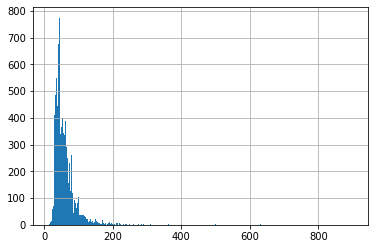

In [15]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

<AxesSubplot:>

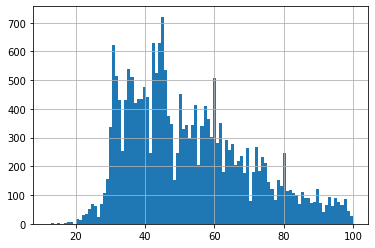

In [16]:
# Визуальная оценка распределения основной части данных
data.query('total_area < 100')['total_area'].hist(bins=100)

In [17]:
# Подсчет количества квартир с площадью менее 28 м^2
len(data.query('total_area < 28'))

392

In [18]:
# Удаление квартир с с площадью менее 28 м^2
data = data.query('total_area >= 28').reset_index(drop=True)

# Проверка результатов удаления
len(data.query('total_area < 28'))

0

#### Изменение типа столбца first_day_exposition

In [19]:
# Оценка содержания данных
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [20]:
# Приведения данных к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверка результатов приведения и данных на реалистичность
data['first_day_exposition'].describe(datetime_is_numeric=True)

count                            23307
mean     2017-11-08 06:50:55.528381952
min                2014-11-27 00:00:00
25%                2017-05-12 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

#### Удаление аномалий в столбце rooms

In [21]:
# Проверка значений столбца
data['rooms'].value_counts()

2     7936
1     7791
3     5814
4     1180
5      326
6      105
0       65
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:>

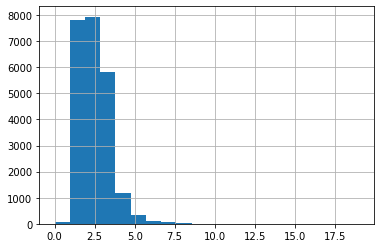

In [22]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=20)

In [23]:
# Подсчет количества квартир с 0 комантами
len(data[data['rooms'] == 0])

65

<AxesSubplot:>

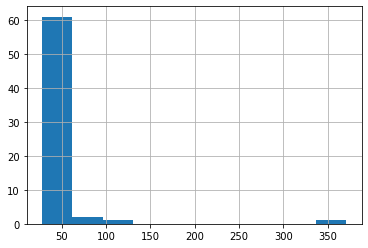

In [24]:
# Оценка площади квартир с 0 комнат
data.query('rooms == 0')['total_area'].hist()

In [25]:
# Замена количества комнат с 0 на 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [26]:
# Проверка результатов замены
data['rooms'].value_counts()

2     7936
1     7856
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

#### Удаление и исправление аномалий в столбце ceiling_height

In [27]:
# Функция для вывода доли пропущенных значений в столбце (синтаксический сахар)
# column_name - (string) Название столбца
def get_missing_values_proportion(column_name):
    length = len(data.query(column_name + '.isnull()'))
    
    print('Пропущенных значений - {} ({:.2%})'.format(length, length / len(data)), sep='')

In [28]:
# Оценка количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8961 (38.45%)


In [29]:
# Вывод основных статистических показателей столбца
data['ceiling_height'].describe()

count    14346.000000
mean         2.763670
std          0.952511
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

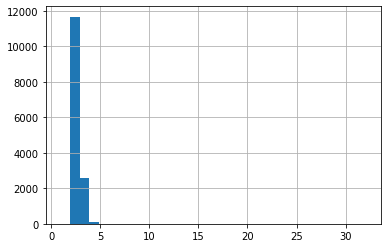

In [30]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=32)

<AxesSubplot:>

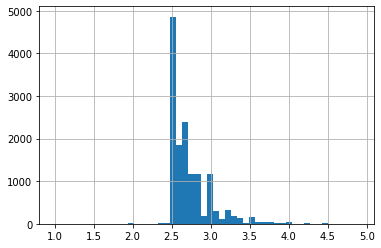

In [31]:
# Визуальная оценка распределения основной части данных
data.query('ceiling_height < 5')['ceiling_height'].hist(bins=50)

<AxesSubplot:>

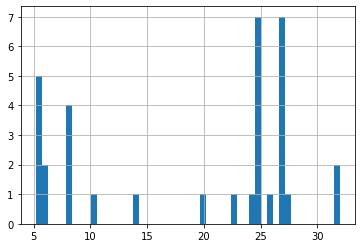

In [32]:
# Визуальная оценка распределения данных с аномально большими значениями
data.query('ceiling_height > 5')['ceiling_height'].hist(bins=50)

In [33]:
# Подсчет количества квартир с аномальными значениями высоты потолка
len(data.query('ceiling_height < 2.5 or ceiling_height > 5'))

105

In [34]:
# Исправление значений у квартир с выстой потолка более и равной 25 м
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] /= 10

<AxesSubplot:>

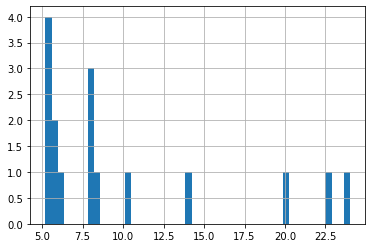

In [35]:
# Проверка результатов исправления
data.query('5 < ceiling_height < 40')['ceiling_height'].hist(bins=50)

<AxesSubplot:>

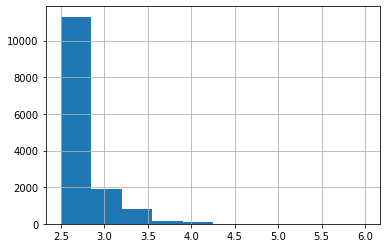

In [36]:
# Удаление аномальных значений
data = data.query('2.5 <= ceiling_height < 7.5 or ceiling_height.isnull()').reset_index(drop=True)

# Проверка результатов удаления
data['ceiling_height'].hist()

In [37]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8961 (38.58%)


#### Удаление пропусков и изменение типа столбца floors_total

In [38]:
# Проверка значений столбца
data['floors_total'].value_counts()

5.0     5714
9.0     3724
16.0    1346
12.0    1338
4.0     1190
10.0    1163
25.0    1032
6.0      896
17.0     813
3.0      659
7.0      586
14.0     537
18.0     480
24.0     439
8.0      381
2.0      368
15.0     354
23.0     341
19.0     316
22.0     274
20.0     268
13.0     229
11.0     200
27.0     158
21.0     146
26.0     124
1.0       23
35.0      22
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: floors_total, dtype: int64

In [39]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('floors_total')

Пропущенных значений - 77 (0.33%)


In [40]:
# Проверка гипотезы о том, что количество этажей не указано, когда в доме 1 этаж
data.query('floors_total.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
233,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
450,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
659,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1718,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22202,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22352,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23120,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [41]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('floors_total')

Пропущенных значений - 0 (0.00%)


In [42]:
# Приведение к целочисленному типу
data['floors_total'] = data['floors_total'].astype('int')

# Проверка результатов приведения
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23145     5
23146     5
23147     3
23148    17
23149     5
Name: floors_total, Length: 23150, dtype: int64

#### Заполнение пропусков и смена типа столбца apartment

In [43]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('apartment')

# Оценка распределения значений
data['apartment'].value_counts()

Пропущенных значений - 20430 (88.25%)


False    2673
True       47
Name: apartment, dtype: int64

In [44]:
# Замена пропущенных значений
data['apartment'] = data['apartment'].fillna(False)

# Проверка результатов замены
data['apartment'].value_counts()

False    23103
True        47
Name: apartment, dtype: int64

In [45]:
# Приведение к булевому типу
data['apartment'] = data['apartment'].astype('bool')

# Проверка результатов приведения
data['apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
23145    False
23146    False
23147    False
23148    False
23149    False
Name: apartment, Length: 23150, dtype: bool

#### Проверка столбца studio

In [46]:
data['studio'].value_counts()

False    23101
True        49
Name: studio, dtype: int64

#### Проверка столбца open_plan

In [47]:
data['open_plan'].value_counts()

False    23122
True        28
Name: open_plan, dtype: int64

#### Удаление пропусков в столбце locality_name, создание столбца clean_locality_name без дубликатов, категоризация типов населенных пунктов, создание цифровых представлений названий и типов населенных пунктов

In [48]:
# Проверка значений столбца
data['locality_name'].value_counts()

Санкт-Петербург                    15420
посёлок Мурино                       463
посёлок Шушары                       431
Всеволожск                           389
Пушкин                               365
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: locality_name, Length: 360, dtype: int64

In [49]:
# Подсчет количества пустых значений
get_missing_values_proportion('locality_name')

Пропущенных значений - 48 (0.21%)


In [50]:
# Удаление пусты значений
data.dropna(subset=['locality_name'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('locality_name')

Пропущенных значений - 0 (0.00%)


In [51]:
# Подсчет уникальных населенных пунктов
len(data['locality_name'].unique())

360

In [52]:
# Импорт функции Mystem из библиотеки 
from pymystem3 import Mystem

m = Mystem()

In [53]:
# Функция для очистки названий насленных пунктов и удаления дубликатов
# name - (string) Название населенного пункта
# возвращает - (string) Очищенное название населенного пункта
def get_clean_locality_name(name):
    splited_name = name.split(' ')
    
    # Разделение назавания на тип и название насленного пункта
    locality_type = []
    locality_name = []
    
    name_started = False
    for word in splited_name:        
        if word[0].isupper() or word == 'имени':
            name_started = True
        
        if name_started:
            locality_name.append(word)
        else:
            locality_type.append(word)
    
    locality_name = ' '.join(locality_name)
    
    # Если название не имеет типа, то он возвращается
    if len(locality_type) == 0:
        return locality_name
    
    # Определение типа насленного пункта
    locality_type = m.lemmatize(' '.join(locality_type))
        
    if 'поселок' in locality_type:
        if 'городской' in locality_type:
            new_type = 'поселок городского типа'
        elif 'станция' in locality_type:
            new_type = 'поселок при железнодорожной станции'
        elif 'коттеджный' in locality_type:
            new_type = 'коттеджный поселок'
        else:
            new_type = 'поселок'
    elif 'деревня' in locality_type:
        new_type = 'деревня'
    elif 'товарищество' in locality_type:
        new_type = 'садовое товарищество'
    elif 'село' in locality_type:
        new_type = 'село'
    else:
        new_type = 'undefined'
        
    locality_type = ''.join(locality_type)[:-1]

    return new_type + ' ' + locality_name

In [54]:
# Создание столбца clean_locality_name c очищенными названиями населенных пунктов
data['clean_locality_name'] = data['locality_name'].apply(get_clean_locality_name)

In [55]:
# Проверка результатов создания
data['clean_locality_name'].value_counts()

Санкт-Петербург         15420
поселок Мурино            489
поселок Шушары            431
Всеволожск                389
Пушкин                    365
                        ...  
поселок Цвылёво             1
деревня Курковицы           1
деревня Кривко              1
поселок Жилпосёлок          1
поселок Дзержинского        1
Name: clean_locality_name, Length: 317, dtype: int64

In [56]:
# Функция для получения типа населенного пункта
# name - (string) Название населенного пункта
# возвращает - (string) Тип населенного пункта
def get_clean_locality_type(name):
    splited_name = name.split(' ')
    
    # Разделение назавания на тип и название насленного пункта
    locality_type = []
    locality_name = []
    
    name_started = False
    for word in splited_name:        
        if word[0].isupper() or word == 'имени':
            name_started = True
        
        if name_started:
            locality_name.append(word)
        else:
            locality_type.append(word)
    
    locality_name = ' '.join(locality_name)
    
    # Если название не имеет типа, то он возвращается
    if len(locality_type) == 0:
        return 'без типа'
    
    # Определение типа насленного пункта
    locality_type = m.lemmatize(' '.join(locality_type))
        
    if 'поселок' in locality_type:
        if 'городской' in locality_type:
            new_type = 'поселок городского типа'
        elif 'станция' in locality_type:
            new_type = 'поселок при железнодорожной станции'
        elif 'коттеджный' in locality_type:
            new_type = 'коттеджный поселок'
        else:
            new_type = 'поселок'
    elif 'деревня' in locality_type:
        new_type = 'деревня'
    elif 'товарищество' in locality_type:
        new_type = 'садовое товарищество'
    elif 'село' in locality_type:
        new_type = 'село'
    else:
        new_type = 'undefined'
        
    locality_type = ''.join(locality_type)[:-1]

    return new_type

In [57]:
# Категоризация данных по типу населенного пункта
data['clean_locality_type'] = data['clean_locality_name'].apply(get_clean_locality_type)

In [58]:
# Проверка результатов категоризации
data['clean_locality_type'].value_counts()

без типа                               19620
поселок                                 1991
деревня                                  902
поселок городского типа                  536
село                                      31
поселок при железнодорожной станции       14
садовое товарищество                       5
коттеджный поселок                         3
Name: clean_locality_type, dtype: int64

In [59]:
# Определение уникальных типов населенных пунктов
unique_types = list(data['clean_locality_type'].unique())

# Функция для получения цифрового представления типа населенного пункта
# type - (string) Тип населенного пункта
# возвращает - (string) Цифровое представления типа населенного пункта
def get_clean_locality_type_number(type):
    return unique_types.index(type)

In [60]:
# Создание столбца с цифровым представлением типа населенного пункта
data['clean_locality_type_number'] = data['clean_locality_type'].apply(get_clean_locality_type_number)

# Проверка результатов создания
data.groupby('clean_locality_type')['clean_locality_type_number'].value_counts()

clean_locality_type                  clean_locality_type_number
без типа                             0                             19620
деревня                              3                               902
коттеджный поселок                   7                                 3
поселок                              1                              1991
поселок городского типа              2                               536
поселок при железнодорожной станции  6                                14
садовое товарищество                 4                                 5
село                                 5                                31
Name: clean_locality_type_number, dtype: int64

In [61]:
# Определение уникальных названий населенных пунктов
unique_names = list(data['clean_locality_name'].unique())

# Функция для получения цифрового представления названия населенного пункта
# name - (string) Название населенного пункта
# возвращает - (string) Цифровое представления названия населенного пункта
def get_clean_locality_name_number(name):
    return unique_names.index(name)

In [62]:
# Создание столбца с цифровым представлением названия населенного пункта
data['clean_locality_name_number'] = data['clean_locality_name'].apply(get_clean_locality_name_number)

# Проверка результатов создания
data.groupby('clean_locality_name')['clean_locality_name_number'].value_counts()

clean_locality_name   clean_locality_name_number
Бокситогорск          73                             16
Волосово              61                             36
Волхов                28                            110
Всеволожск            27                            389
Выборг                15                            229
                                                   ... 
село Путилово         45                              2
село Рождествено      209                             3
село Русско-Высоцкое  187                             9
село Старая Ладога    189                             2
село Шум              271                             1
Name: clean_locality_name_number, Length: 317, dtype: int64

#### Удаление аномальных значений в столбце living_area

In [63]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    21295.000000
mean        34.750966
std         22.122102
min          2.000000
25%         19.000000
50%         30.100000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

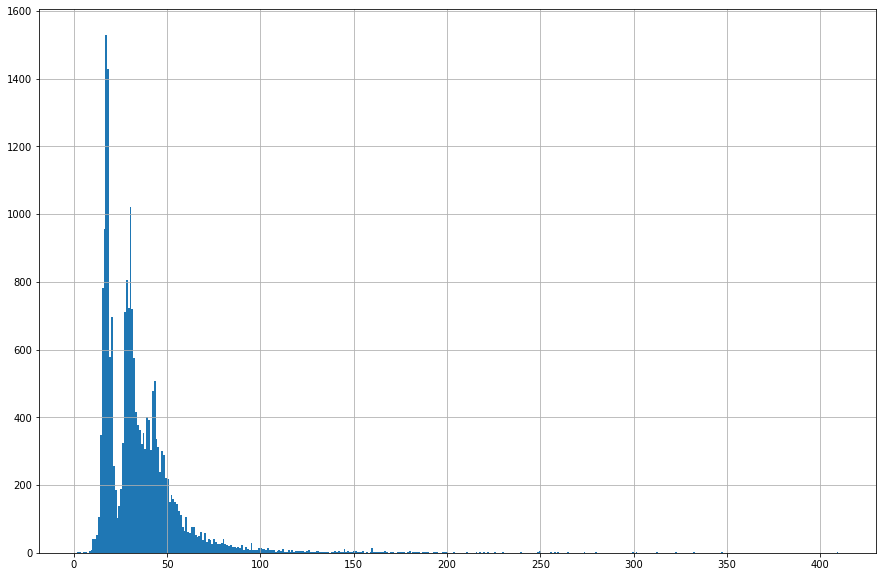

In [64]:
# Визуальная оценка расперделения значений
data['living_area'].hist(bins=409, figsize=(15, 10))

<AxesSubplot:>

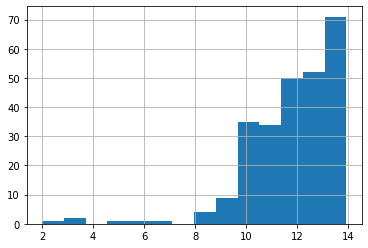

In [65]:
# Визуальная оценка распределения значений, меньших 14 м
data.query('living_area < 14')['living_area'].hist(bins=14)

In [66]:
# Подсчет количества квартир с жилой площадью менее 14 м
len(data.query('living_area < 14'))

261

In [67]:
# Удаление записей с жилой площадью менее 14 м
data = data.query('living_area >= 14 or living_area.isnull()').reset_index(drop=True)

# Проверка результатов удаления
len(data.query('living_area < 14'))

0

In [68]:
# Подсчет колисества пропущенных значений
get_missing_values_proportion('living_area')

Пропущенных значений - 1807 (7.91%)


In [69]:
# Проверка наличия квартир со значением жилой площади, большим, чем значение общей площади
len(data.query('living_area >= total_area'))

0

#### Проверка столбца floor

In [70]:
# Вывод основных статистических параметров столбца
data['floor'].describe()

count    22841.000000
mean         5.828860
std          4.819991
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [71]:
# Проверка наличия квартир со этажом, большим, чем общее количество этажей в здании
len(data.query('floor > floors_total'))

0

#### Проверка столбца kitchen_area

In [72]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    20929.000000
mean        10.550555
std          5.894932
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

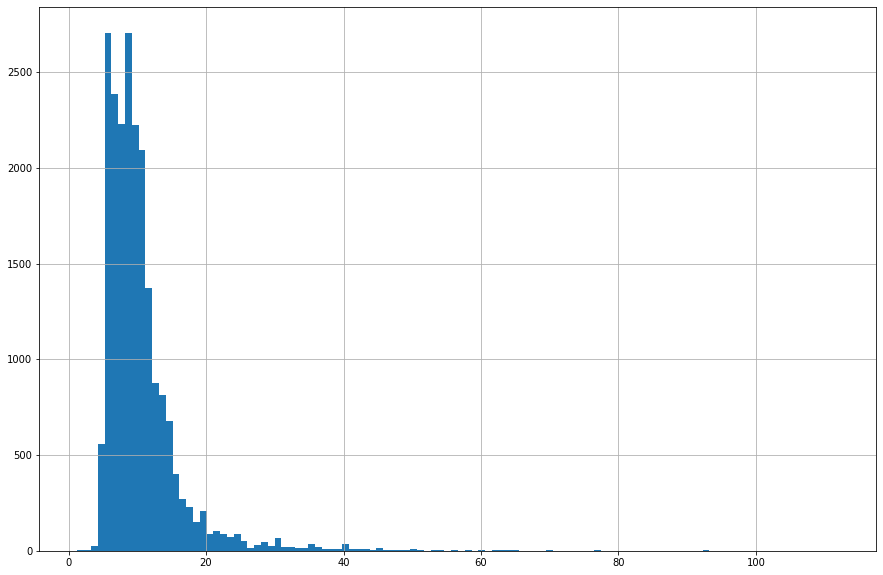

In [73]:
# Визуальная оценка расперделения значений
data['kitchen_area'].hist(bins=112, figsize=(15, 10))

In [74]:
# Проверка наличия квартир со значением площади кухни, большим, чем значение общей площади
len(data.query('kitchen_area >= total_area'))

0

In [75]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 1912 (8.37%)


#### Заполнение пропусков и приведение к целочисленному типу столбца balcony

In [76]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

count    11719.000000
mean         1.157181
std          1.074955
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [77]:
# Оценка значений столбца
data['balcony'].value_counts()

1.0    4082
0.0    3569
2.0    3507
5.0     300
4.0     182
3.0      79
Name: balcony, dtype: int64

In [78]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('balcony')

Пропущенных значений - 11122 (48.69%)


In [79]:
# Замена пропущенных значений на 0
data['balcony'] = data['balcony'].fillna(0)

# Проверка результатов замены
get_missing_values_proportion('balcony')

Пропущенных значений - 0 (0.00%)


In [80]:
# Приведение столбца к целочисленному типу
data['balcony'] = data['balcony'].astype('int')

# Проверка результатов приведения
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
22836    0
22837    0
22838    0
22839    0
22840    2
Name: balcony, Length: 22841, dtype: int64

#### Заполнение пропусков в столбце airports_nearest

In [81]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

count    17598.000000
mean     28825.682634
std      12602.968939
min          0.000000
25%      18590.000000
50%      26773.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

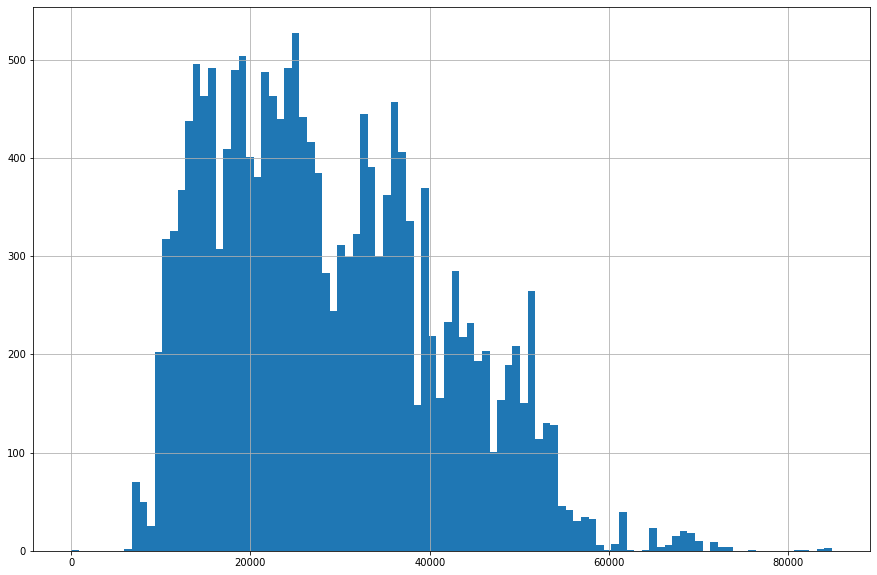

In [82]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=100, figsize=(15, 10))

In [83]:
# Оценка квартир с аномальным значением расстояния до аэропорта (0) и их количества
data.query('airports_nearest < 4000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clean_locality_name,clean_locality_type,clean_locality_type_number,clean_locality_name_number
20335,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург,без типа,0,0


In [84]:
# Подсчет количества квартир с указанной информацией о расстоянии до ближайшего аэропорта для каждого населенного пункта
airports_nearest_stat = data.pivot_table(index='clean_locality_name', values='airports_nearest', aggfunc='count')

# Подсчет и анализ населенных пунктов, где нет квартир с указанным до аэропорта расстоянием
len(airports_nearest_stat.query('airports_nearest == 0'))

292

In [85]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('airports_nearest')

Пропущенных значений - 5243 (22.95%)


<AxesSubplot:xlabel='airports_nearest', ylabel='clean_locality_name_number'>

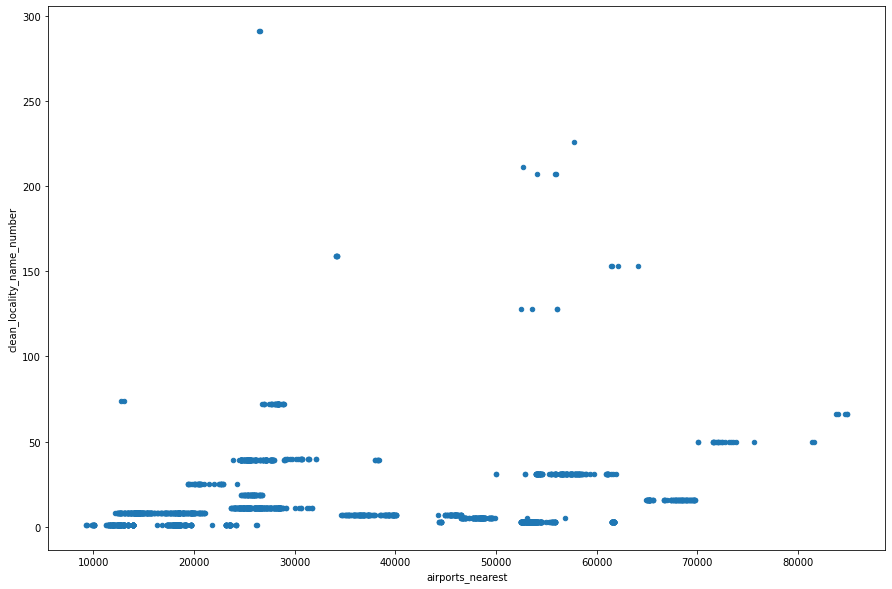

In [86]:
# Проверка гипотезы, что расстояние до аэропорта в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='airports_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

<AxesSubplot:>

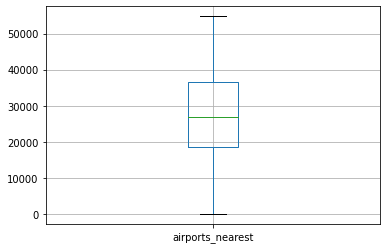

In [87]:
# Проверка гипотезы, что расстояние до аэропорта внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='airports_nearest')
)

In [88]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and airports_nearest.isnull()'))

81

In [89]:
# Функция для расчета медианного значения расстояния до ближайшего аэропорта для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до ближайшего аэропорта
def get_airports_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['airports_nearest'].isnull() == False)
    ]['airports_nearest'].median()

In [90]:
# Заполнение пропусков и аномалий медианными значениями
data.loc[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург'), 'airports_nearest'] = data[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург')].apply(get_airports_nearest_median, axis=1)

# Оценка резульатов заполнения
get_missing_values_proportion('airports_nearest')

Пропущенных значений - 5237 (22.93%)


#### Заполнение пропусков в столбце city_сenters_nearest

In [91]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

count    17621.000000
mean     14182.541343
std       8625.836881
min        181.000000
25%       9234.000000
50%      13073.000000
75%      16268.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:>

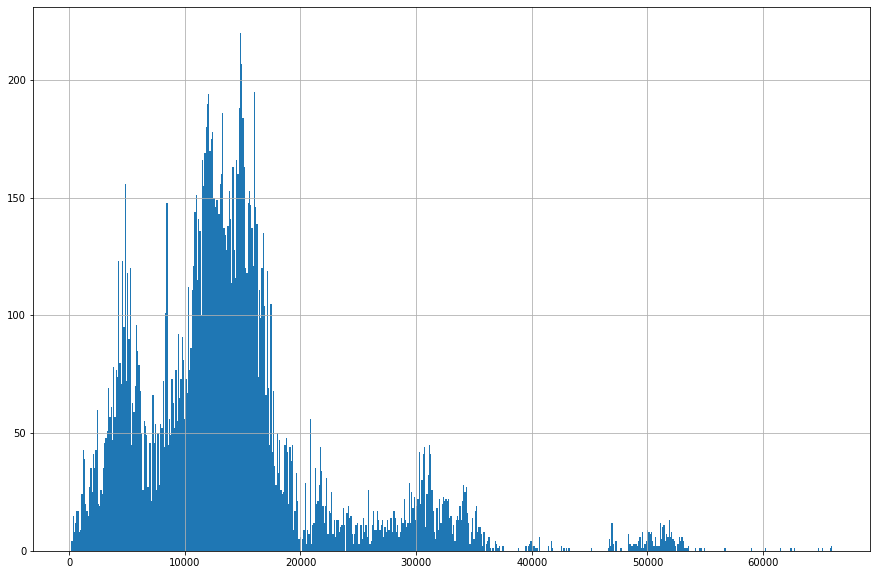

In [92]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=600, figsize=(15,10))

In [93]:
# Определение населенных пунктов с возможно, аномально большими значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest > 38000')['locality_name'].unique()

array(['Ломоносов', 'Кронштадт', 'Петергоф', 'Зеленогорск',
       'посёлок Молодёжное', 'Красное Село', 'посёлок Репино',
       'посёлок Белоостров', 'Сестрорецк'], dtype=object)

In [94]:
# Определение населенных пунктов с предположительно нормальными значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest < 20000')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово'],
      dtype=object)

In [95]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('city_сenters_nearest')

Пропущенных значений - 5220 (22.85%)


In [96]:
# Проверка степени корреляции значений столбца со значениями других столбцов
data.corr()['city_сenters_nearest'].sort_values()

ceiling_height               -0.368760
total_area                   -0.234870
living_area                  -0.233544
last_price                   -0.207534
kitchen_area                 -0.193326
rooms                        -0.188551
parks_around_3000            -0.163036
ponds_around_3000            -0.074601
days_exposition              -0.060909
total_images                 -0.048098
parks_nearest                -0.036605
studio                       -0.007147
open_plan                     0.000936
apartment                     0.005694
floor                         0.007097
floors_total                  0.017308
ponds_nearest                 0.033420
balcony                       0.065545
clean_locality_type_number    0.250649
airports_nearest              0.270207
clean_locality_name_number    0.455558
city_сenters_nearest          1.000000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:xlabel='city_сenters_nearest', ylabel='clean_locality_name_number'>

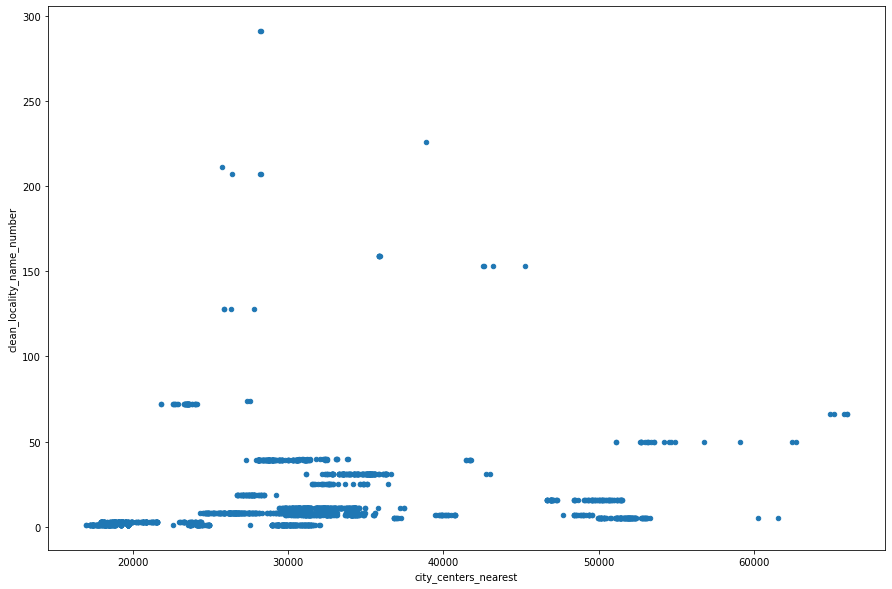

In [97]:
# Проверка гипотезы, что расстояние до центра Санкт-Петербурга в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='city_сenters_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

<AxesSubplot:>

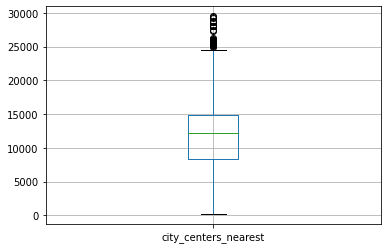

In [98]:
# Проверка гипотезы, что расстояние центра Санкт-Петербурга внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='city_сenters_nearest')
)

In [99]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and city_сenters_nearest.isnull()'))

57

In [100]:
# Функция для расчета медианного значения расстояния до центра Санкт-Петербурга для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до центра Санкт-Петербурга
def get_city_сenters_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['city_сenters_nearest'].isnull() == False)
    ]['city_сenters_nearest'].median()

In [101]:
# Заполнение пропусков медианными значениями
data.loc[(data['city_сenters_nearest'].isnull()) & (data['clean_locality_name'] != 'Санкт-Петербург'), 'city_сenters_nearest'] = data[(data['city_сenters_nearest'].isnull()) & (data['clean_locality_name'] != 'Санкт-Петербург')].apply(get_city_сenters_nearest_median, axis=1)

# Проверка результатов заполнения
get_missing_values_proportion('city_сenters_nearest')

Пропущенных значений - 5213 (22.82%)


#### Заполнение пропусков и приведение к целочисленному типу столбца parks_around_3000

In [102]:
# Вывод основных статистических параметров столбца
data['parks_around_3000'].describe()

count    17622.000000
mean         0.613948
std          0.803513
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [103]:
# Оценка значений столбца
data['parks_around_3000'].value_counts()

0.0    9768
1.0    5524
2.0    1695
3.0     635
Name: parks_around_3000, dtype: int64

In [104]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_around_3000')

Пропущенных значений - 5219 (22.85%)


In [105]:
# Проверка наличия информации о расстоянии до ближайшего парка для пропущенных значений
len(data.query('parks_around_3000.isnull() and ~parks_nearest.isnull()'))

0

In [106]:
# Заполнение оставшихся пропусков 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('parks_around_3000')

Пропущенных значений - 0 (0.00%)


In [107]:
# Приведение столбца к целочисленному типу
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

# Проверка результатов приведения
data['parks_around_3000']

0        1
1        0
2        1
3        2
4        2
        ..
22836    1
22837    1
22838    0
22839    0
22840    2
Name: parks_around_3000, Length: 22841, dtype: int64

#### Заполнение пропусков в столбце parks_nearest 

In [108]:
# Вывод основных статистических параметров столбца
data['parks_nearest'].describe()

count    7858.000000
mean      490.089081
std       340.807534
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [109]:
# Проверка наличия дробных значений
len(data.query('parks_nearest % 1 != 0'))

14983

<AxesSubplot:>

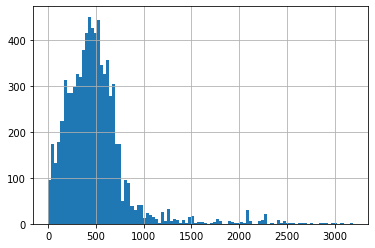

In [110]:
data['parks_nearest'].hist(bins=100)

In [111]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_nearest')

Пропущенных значений - 14983 (65.60%)


In [112]:
# Проверка гипотезы о том, что количество пропусков в столбце parks_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('parks_around_3000 == 0'))

14987

#### Заполнение пропусков и приведение к целочисленному типу столбца ponds_around_3000

In [113]:
# Вывод основных статистических параметров столбца
data['ponds_around_3000'].describe()

count    17622.000000
mean         0.768641
std          0.940961
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [114]:
# Оценка значений столбца
data['ponds_around_3000'].value_counts()

0.0    8845
1.0    5475
2.0    1836
3.0    1466
Name: ponds_around_3000, dtype: int64

In [115]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_around_3000')

Пропущенных значений - 5219 (22.85%)


In [116]:
# Проверка наличия информации о расстоянии до ближайшего пруда для пропущенных значений
len(data.query('ponds_around_3000.isnull() and ~ponds_around_3000.isnull()'))

0

In [117]:
# Заполнение оставшихся пропусков 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('ponds_around_3000')

Пропущенных значений - 0 (0.00%)


In [118]:
# Приведение столбца к целочисленному типу
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

# Проверка результатов приведения
data['ponds_around_3000']

0        2
1        0
2        2
3        3
4        1
        ..
22836    1
22837    3
22838    0
22839    0
22840    3
Name: ponds_around_3000, Length: 22841, dtype: int64

#### Заполнение пропусков в столбце ponds_nearest 

In [119]:
# Вывод основных статистических параметров столбца
data['ponds_nearest'].describe()

count    8777.000000
mean      518.163495
std       277.591198
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [120]:
# Проверка наличия дробных значений
len(data.query('ponds_nearest % 1 != 0'))

14064

<AxesSubplot:>

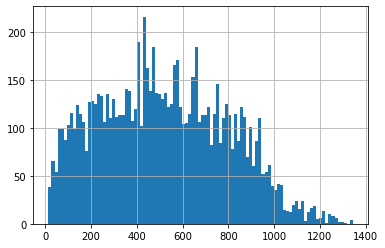

In [121]:
data['ponds_nearest'].hist(bins=100)

In [122]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_nearest')

Пропущенных значений - 14064 (61.57%)


In [123]:
# Проверка гипотезы о том, что количество пропусков в столбце ponds_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('ponds_around_3000 == 0'))

14064

#### Заполнение пропусков в столбце days_exposition

In [124]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19730.000000
mean       182.138723
std        221.203594
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [125]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('days_exposition % 1 > 1e-10'))

0

<AxesSubplot:>

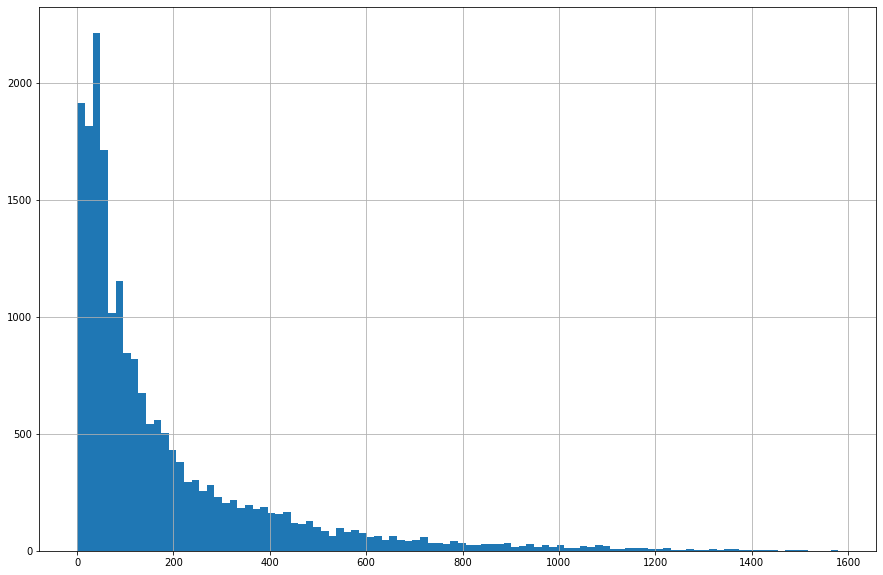

In [126]:
data['days_exposition'].hist(bins=100, figsize=(15, 10))

In [127]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('days_exposition')

Пропущенных значений - 3111 (13.62%)


#### Заполнение пропусков в столбце ceiling_height

In [128]:
# Проверка корреляции значений столбца ceiling_height с другими столбцами
data.corr()['ceiling_height'].sort_values()

city_сenters_nearest         -0.368662
clean_locality_name_number   -0.147348
ponds_nearest                -0.145545
airports_nearest             -0.108385
clean_locality_type_number   -0.101333
floors_total                 -0.097202
balcony                      -0.076209
parks_nearest                -0.058843
floor                        -0.047410
open_plan                     0.012741
studio                        0.021844
total_images                  0.046282
apartment                     0.070834
days_exposition               0.132068
ponds_around_3000             0.266729
parks_around_3000             0.298474
rooms                         0.306254
last_price                    0.401991
kitchen_area                  0.423173
living_area                   0.469251
total_area                    0.489765
ceiling_height                1.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>

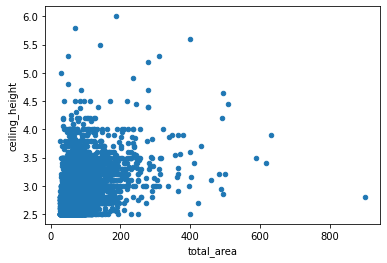

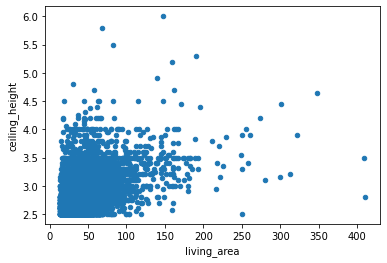

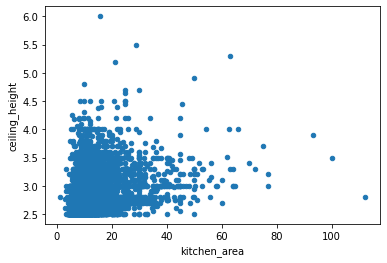

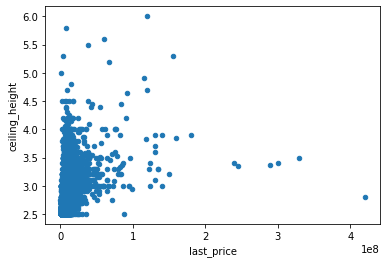

In [129]:
# Визуальная проверка корреляции значений столбца ceiling_height со столбцами, показывающими наибольшую степень корреляции
data.plot(x='total_area', y='ceiling_height', kind='scatter')
data.plot(x='living_area', y='ceiling_height', kind='scatter')
data.plot(x='kitchen_area', y='ceiling_height', kind='scatter')
data.plot(x='last_price', y='ceiling_height', kind='scatter')

<AxesSubplot:xlabel='ceiling_height', ylabel='clean_locality_name_number'>

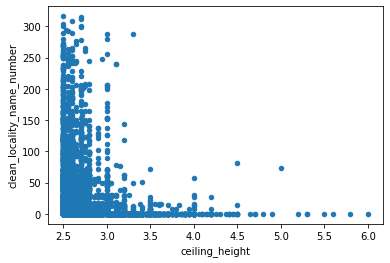

In [130]:
# Проверка гипотезы о том, что в одном населенном пунке одинаковая высота потолков
data.plot(x='ceiling_height', y='clean_locality_name_number', kind='scatter')

In [131]:
# Функция для расчета медианного значения высоты потолка для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана высоты потолка
def get_ceiling_height_median(row): 
    return data[
        (data.index != row.name) &
        (data['floors_total'] == row['floors_total']) &
        (data['clean_locality_name'] == row['clean_locality_name']) &
        ((data['total_area'] // 10) == (row['total_area'] // 10)) &
        ((data['city_сenters_nearest'] // 1000) == (row['city_сenters_nearest'] // 1000)) &
        (data['ceiling_height'].isnull() == False)
    ]['ceiling_height'].median()    

0.708871680445837

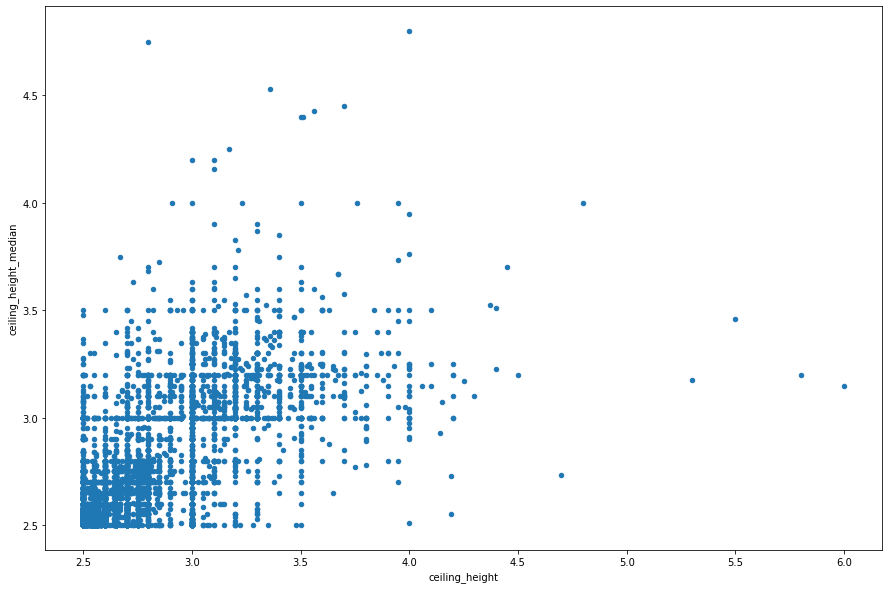

In [132]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['ceiling_height'].isnull() == False, 'ceiling_height_median'] = data.apply(get_ceiling_height_median, axis=1)

# Проверка результатов апробации
data.plot(x='ceiling_height', y='ceiling_height_median', kind='scatter', figsize=(15, 10))
data['ceiling_height'].corr(data['ceiling_height_median'])

In [133]:
# Замена пропусков на медианные значения
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data[data['ceiling_height'].isnull()].apply(get_ceiling_height_median, axis=1)

In [134]:
# Проверка результатов замены
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 3566 (15.61%)


#### Заполнение пропусков в столбцах living_area и kitchen_area

In [135]:
# Подсчет пропусков
get_missing_values_proportion('living_area')
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 1807 (7.91%)
Пропущенных значений - 1912 (8.37%)


In [136]:
# Проверка корреляции значений столбца living_area с другими столбцами
data.corr()['living_area'].sort_values()

city_сenters_nearest         -0.233643
floors_total                 -0.160544
clean_locality_type_number   -0.107957
floor                        -0.090267
ponds_nearest                -0.084355
clean_locality_name_number   -0.081448
airports_nearest             -0.059786
parks_nearest                -0.050308
studio                       -0.025013
balcony                      -0.016796
open_plan                    -0.016611
apartment                     0.030059
total_images                  0.100404
days_exposition               0.139998
ponds_around_3000             0.185602
parks_around_3000             0.212898
kitchen_area                  0.441568
ceiling_height                0.476244
ceiling_height_median         0.549994
last_price                    0.567450
rooms                         0.847815
total_area                    0.940512
living_area                   1.000000
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area', ylabel='rooms'>

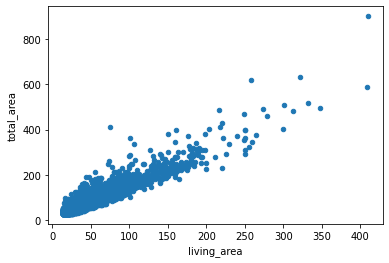

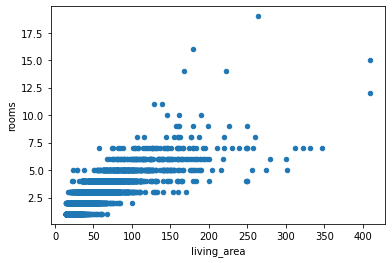

In [137]:
data.plot(x='living_area', y='total_area', kind='scatter')
data.plot(x='living_area', y='rooms', kind='scatter')

In [138]:
# Функция для расчета медианного значения жилой площади для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана жилой площади
def get_living_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        (data['rooms'] == row['rooms']) &
        (data['living_area'].isnull() == False)
    ]['living_area'].median()    

0.9555323380090637

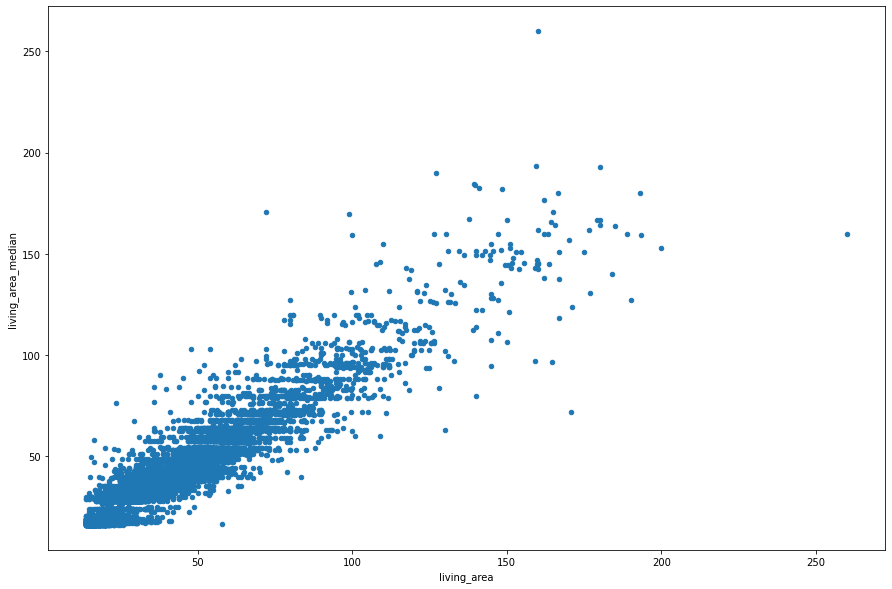

In [139]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['living_area'].isnull() == False, 'living_area_median'] = data.apply(get_living_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='living_area', y='living_area_median', kind='scatter', figsize=(15, 10))
data['living_area'].corr(data['living_area_median'])

In [140]:
# Замена пропусков на медианные значения
data.loc[data['living_area'].isnull(), 'living_area'] = data[data['living_area'].isnull()].apply(get_living_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('living_area')

Пропущенных значений - 22 (0.10%)


In [141]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['living_area'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('living_area')

Пропущенных значений - 0 (0.00%)


In [142]:
# Проверка корреляции значений столбца living_area с другими столбцами
data.corr()['kitchen_area'].sort_values()

city_сenters_nearest         -0.193165
clean_locality_name_number   -0.127502
ponds_nearest                -0.103798
clean_locality_type_number   -0.054777
airports_nearest              0.005423
parks_nearest                 0.026765
balcony                       0.046358
apartment                     0.052989
days_exposition               0.102301
total_images                  0.108321
parks_around_3000             0.122858
floor                         0.134863
floors_total                  0.163259
ponds_around_3000             0.178869
rooms                         0.276860
ceiling_height                0.427354
ceiling_height_median         0.441634
living_area                   0.443294
living_area_median            0.468040
last_price                    0.526311
total_area                    0.617655
kitchen_area                  1.000000
studio                             NaN
open_plan                          NaN
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>

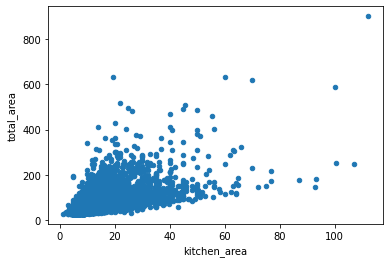

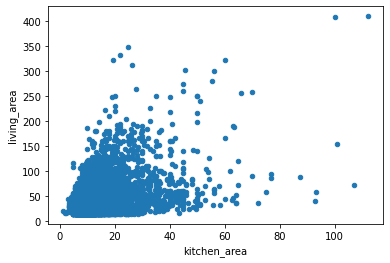

In [143]:
data.plot(x='kitchen_area', y='total_area', kind='scatter')
data.plot(x='kitchen_area', y='living_area', kind='scatter')

In [144]:
# Функция для расчета медианного значения площади кухни для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана площади кухни
def get_kitchen_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        ((data['living_area'] // 5) == (row['living_area'] // 5)) &
        (data['ceiling_height'] == row['ceiling_height']) &
        (data['kitchen_area'].isnull() == False)
    ]['kitchen_area'].median()    

0.7565322903368027

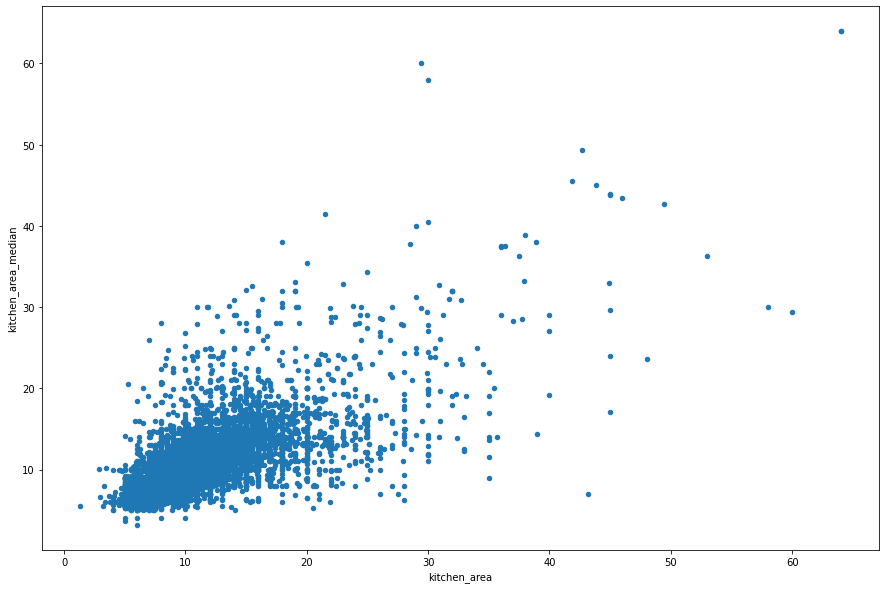

In [145]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['kitchen_area'].isnull() == False, 'kitchen_area_median'] = data.apply(get_kitchen_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='kitchen_area', y='kitchen_area_median', kind='scatter', figsize=(15, 10))
data['kitchen_area'].corr(data['kitchen_area_median'])

In [146]:
# Замена пропусков на медианные значения
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data[data['kitchen_area'].isnull()].apply(get_kitchen_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 708 (3.10%)


In [147]:
# Удаление ненужных столбцов
data = data.drop(columns=['ceiling_height_median', 'living_area_median', 'kitchen_area_median'])

In [148]:
# Проверка результатов преодобработки данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22819 entries, 0 to 22818
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                22819 non-null  int64         
 1   last_price                  22819 non-null  int64         
 2   total_area                  22819 non-null  float64       
 3   first_day_exposition        22819 non-null  datetime64[ns]
 4   rooms                       22819 non-null  int64         
 5   ceiling_height              19257 non-null  float64       
 6   floors_total                22819 non-null  int64         
 7   living_area                 22819 non-null  float64       
 8   floor                       22819 non-null  int64         
 9   apartment                   22819 non-null  bool          
 10  studio                      22819 non-null  bool          
 11  open_plan                   22819 non-null  bool      

### Выводы (шаг 2)

__В ходе предобработки данных была выполнена следующая работа:__

Переименовано 4 столбца для их соответствия общей стилистики нейминга.

Проведена проверка столбца __total_images__ на пропуски и аномалии - таковых не выявлено.

У столбца __last_price__ изменен тип на целочисленный с целью экономии памяти.

В столбце __total_area__ были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам площадь квартиры должна составлять не менее 28 $м^2$ (http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки.

Столбец __first_day_exposition__ приведен к типу datetime.

В столбце __room__ было обнаружено незначительное количество (65) записей со значением столбца 0. Было обнаружено, что эти квартиры имеют маленькую площадь. Был сделан вывод, что, скорее всего, это маленькие квартиры с 1 комнатой. В связи с этим значение 0 в столбце было заменено на 1.

В столбце __floors_total__ было обнаружено незначительное количество пропусков (0.33%). Эти записи были удалены ввиду их малого количества. Столбец был приведен к целочисленному типу с целью экономии памяти.

В столбце __apartment__ было обнаружено значительное количество пропусков (88.25%). В связи с тем, что количество апартаментов, как и студий и квартир со свободной планировкой очень мало, было решено заполнить пропуски False. Столбец был приведен к типу bool с целью экономии памяти.

Проведена проверка столбцов __studio__ и __open_plan__ на пропуски - таковых не выявлено.

В столбце __locality_name__ было обнаружено незначительное количество пропусков (0.21%). Эти записи были удалены ввиду их малого количества. На основе столбца __locality_name__ были созданы следующие столбцы:
- __clean_locality_name__, содержащий очищенные от дубликатов названия населенных пунктов;
- __clean_locality_type__, содержащий категоризированные типы населенных пунктов;
- __clean_locality_type_number__, содержащий цифровое представление столбца __clean_locality_type__. Оно необходимо для упрощения построения графиков;
- __clean_locality_name_number__, содержащий цифровое представление столбца __cclean_locality_name__. Оно необходимо для упрощения построения графиков.

Проведена проверка столбца __floors__ на пропуски и аномалии - таковых не выявлено.

В столбце __balcony__ было обнаружено значительное количество пропусков (48.69%). В связи с тем, что во многих квартирах может не быть балконов, было решено заполнить пропуски 0. Столбец был приведен к типу int с целью экономии памяти.

В столбце __airports_nearest__ было обнаружено значительное количество пропусков (22.95%), а также 1 запись с аномальным значением - 0 м до аэропорта. Было выявлено, что в расстояние до аэропорта в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пункте. Но в большинстве населенных пунктов (292) вообще не фигурирует ни одной записи о расстоянии до аэропорта. В связи с этим было заполнено лишь 0.02% данных.

В столбце __city_center_nearest__ было обнаружено значительное количество пропусков (22.85%). Было выявлено, что расстояние измеряется не до центра населенного пункта, а до центра Санкт-Петербурга. Также было выявлено, что в расстояние до центра в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пунке. Но в большинстве населенных пунктов вообще не фигурирует ни одной записи о расстоянии до центра. В связи с этим было заполнено лишь 0.03% данных. Остальные пропуски было решено заполнить -1, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Хоть столбец и является важным для одной из целей исследование, отсутствие какой-либо корреляции с другими столбцами, не позволяет заполнить пропуски.

В столбце __praks_around_3000__ было обнаружено значительное количество пропусков (22.85%). Также было выявлено, что в столбце __parks_nearest__:
- отсутствуют данные о парках далее 3 км;
- отсутствуют данные для записей, где есть пропуски в столбце __praks_around_3000__;
- количество пропусков составляет 65.60% и равно сумме пропусков и нулевых значений в столбце __praks_around_3000__.
В связи с этим было принято решение заполнить пропуски в столбце __praks_around_3000__ "0", а в столбце __parks_nearest__ "-1", так как, скорее всего, пропуски означают отсуствие прудов в радиусе 3 км.

В столбцах __ponds_around_3000__ и __ponds_nearest__ ситуация повторилась, за исключением того, что данные столбца __ponds_nearest__ имеют максимальное значение около 1350 м. В связи с этим, возможно, дано не верное определение столбца __ponds_around_3000__, и они оба несут информацию о пруда в радиусе 1.5. Но данную информацию необходимо уточнять у поставщика данных.

В столбце __days_exposition__ было обнаружено значительное количество пропусков (13.62%). В связи с тем, что пропуски в столбце не подлежат восстановлению на основе каких-либо других данных, было решено заполнить пропуски -1, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Столбец был приведен к типу int с целью экономии памяти.

В столбце __ceiling_height__ было обнаружено незначительное количество аномалий (102) - высота потолка ниже 2.5 м и выше 5 м. Значения более 25 м было решено разделить на 10, так как их было чуть больше других, что может свидетельствовать о том, что клиент забыл поставить точку в дробном числе. Остальные аномалии были удалены в виду их малого количества. Также в столбце было обнаружено значительное количество пропусков (38.58%). Было выявлено, что медиана высота потолка в схожих домах коррелирует на уровне 0.71. Гипотеза строилась на основе того, что квартиры в одном населенном пунке, со схожим расстоянием до цента, одинаковым количеством этажей и схожей площадью - это квартиры в одном или похожих по типу застройки домах, где высота потолка будет схожа. Пропуски были заполнены медианными значениями. После заполнения в столбце осталось 16% пропусков, которые, хоть и влияют на цель исследования, но не могут быть заполнены.

В столбце __living_area__ были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам жилая площадь квартиры должна составлять не менее 14 $м^2$ (http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки (262 шт). Также в столбце было обнаружено значительное количество пропусков (7.91%). Было выявлено, что жилая площадь очень сильно коррелирует с общей площадью квартиры и количеством комнат (коэффициент корреляции Пирсона - 0.94 и 0.85, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим двум критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.95). Оставшиеся пропуски составили незначительные 0.1% и были удалены.

В столбце __kitchen_area__ было обнаружено значительное количество пропусков (8.37%). Было выявлено, что площадь кухни определенным образом коррелирует с общей площадью квартиры, жилой площадью и высотой потолка (коэффициент корреляции Пирсона - 0.43, 0.44 и 0.62, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.72). Оставшиеся пропуски составили 3.1%.

В большинстве столбцов пропуски были успешно заполнены, незначительное количество данных удалено. В реальной ситуации заполнение пропусков должно быть согласовано с поставщиком данных. Многие пропуски удастся после этого полностью восстановить. Также видно, что многие пропуски - результат ошибок в алгоритмах, а не следствие действия пользователя. Например, расстояние до центра города или аэропорта явно вычисляется какой-либо системой, а не вручную указывается пользователем.

## Шаг 3. Посчитайте и добавьте в таблицу

### Цена квадратного метра

In [149]:
# Расчет цены квадратного метра
data['m2_price'] = data['last_price'] / data['total_area']

# Проверка расчета
data['m2_price'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: m2_price, dtype: float64

### День недели, месяц и год публикации объявления

In [150]:
# Расчет дня недели публикации объявления
data['exposition_day_of_week'] = data['first_day_exposition'].dt.dayofweek

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_day_of_week']]

,first_day_exposition,exposition_day_of_week
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


In [151]:
# Расчет месяца публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_month']]

,first_day_exposition,exposition_month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


In [152]:
# Расчет года публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_year']]

,first_day_exposition,exposition_year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


### Этаж квартиры (варианты — первый, последний, другой)

In [153]:
# Проверка количества домов с одним этажем
len(data.query('floors_total == 1'))

23

In [154]:
# Функция для определения типа этажа
# row - (Series) Строка данных
# возвращает - (String) Тип этажа
def get_floor_category(row):
    if row['floor'] == 1:
        if row['floor'] == row['floors_total']:
            return 'другой'
        
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

In [155]:
# Расчет типа этажа квартиры
data['floor_type'] = data.apply(get_floor_category, axis=1)

# Проверка расчета
data.loc[:4, ['floor', 'floors_total', 'floor_type']]

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


In [156]:
# Проверка расчета для последних этажей
data.query('floor == floors_total')['floor_type'].head()

11    последний
12    последний
22    последний
35    последний
42    последний
Name: floor_type, dtype: object

In [157]:
# Проверка расчета для домов с одним этажем
data.query('floors_total == 1')['floor_type'].head()

2962    другой
4224    другой
5110    другой
5496    другой
5580    другой
Name: floor_type, dtype: object

### Cоотношение жилой и общей площади

In [158]:
# Расчет соотношения жилой и общей площади
data['living_total_area_ratio'] = data['living_area'] / data['total_area']

# Проверка расчета
data['living_total_area_ratio'].head()

0    0.472222
1    0.460396
2    0.612500
3    0.550629
4    0.320000
Name: living_total_area_ratio, dtype: float64

### Отношение площади кухни к общей

In [159]:
# Расчет отношения площади кухни к общей
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']

# Проверка расчета
data['kitchen_total_area_ratio'].head()

0    0.231481
1    0.272277
2    0.148214
3         NaN
4    0.410000
Name: kitchen_total_area_ratio, dtype: float64

### Выводы (шаг 3)

Выполнены все необходимые расчеты.

Для квартир в домах с одним этажем указан тип этажа "другой".

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Анализ площади, цены, числа комнат и высоты потолков

#### Изучение столбца total_area

In [160]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

count    22819.000000
mean        61.005718
std         34.878136
min         28.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

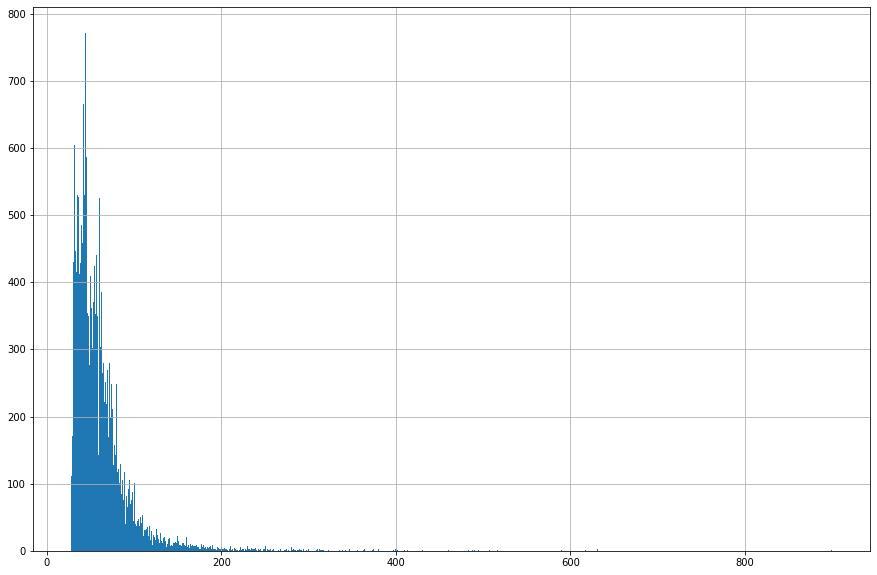

In [161]:
# Вывод гистограммы столбца
data['total_area'].hist(bins=900, figsize=(15, 10))

<AxesSubplot:>

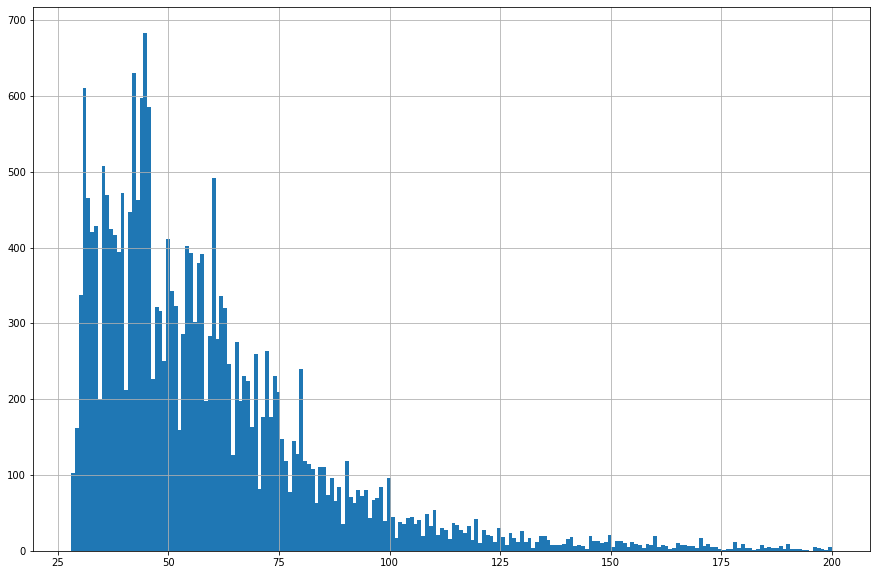

In [162]:
# Вывод гистограммы основной части данных столбца
data.query('total_area <= 200')['total_area'].hist(bins=200, figsize=(15, 10))

<AxesSubplot:>

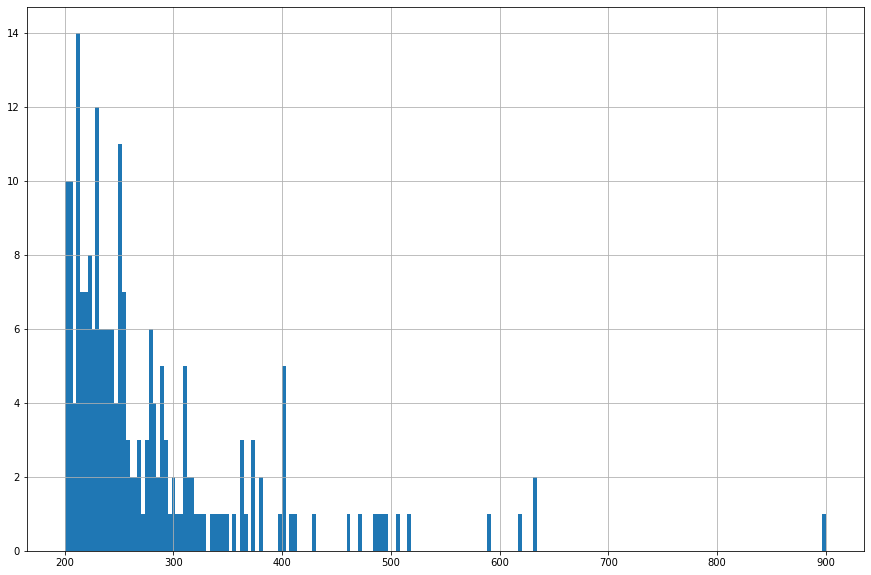

In [163]:
# Вывод гистограммы "хвоста" данных столбца
data.query('total_area > 200')['total_area'].hist(bins=200, figsize=(15, 10))

#### Изучение столбца living_area

In [164]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    22819.000000
mean        35.031446
std         22.052921
min         14.000000
25%         19.000000
50%         30.300000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

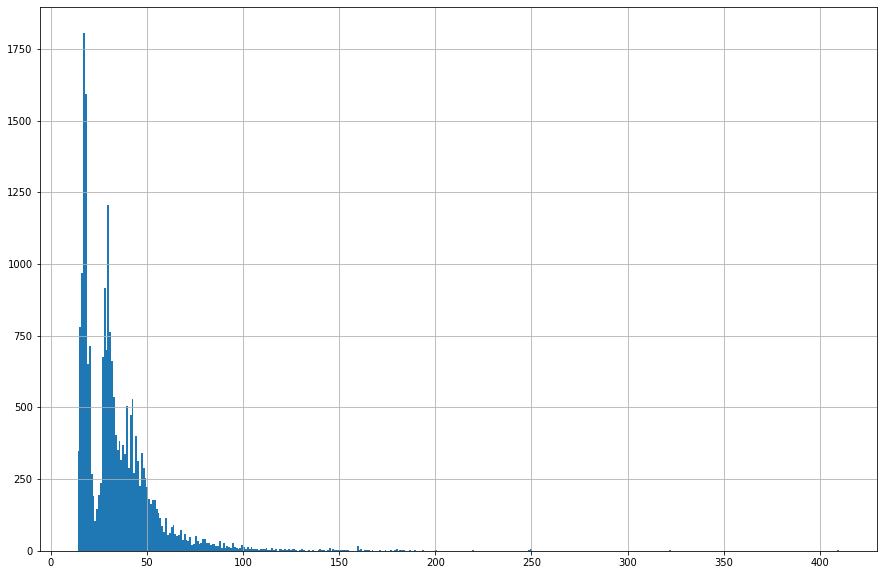

In [165]:
# Вывод гистограммы столбца
data['living_area'].hist(bins=409, figsize=(15, 10))

<AxesSubplot:>

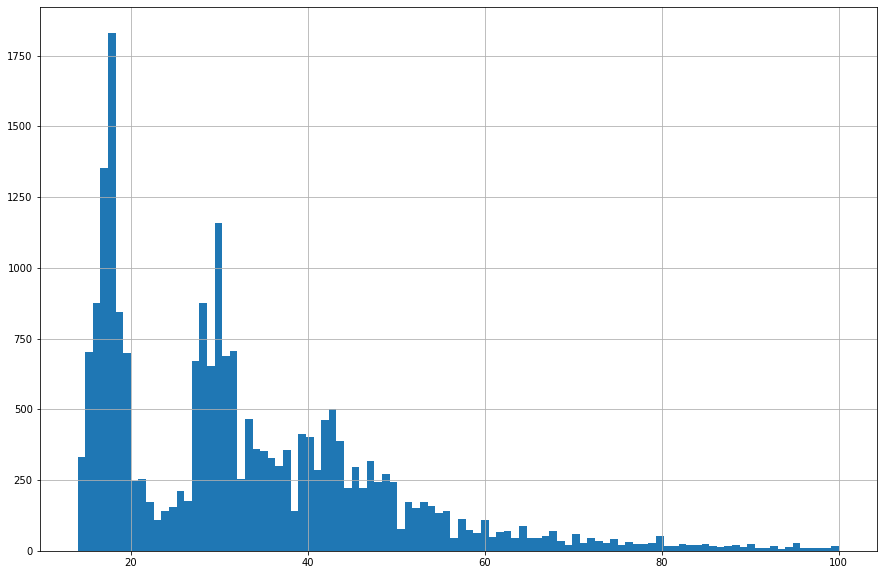

In [166]:
# Вывод гистограммы основной части данных столбца
data.query('living_area <= 100')['living_area'].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

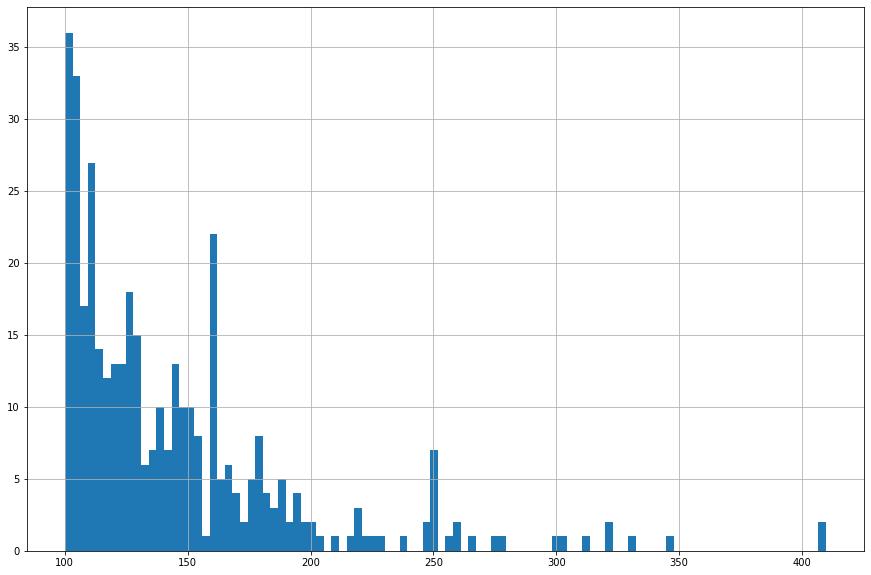

In [167]:
# Вывод гистограммы "хвоста" данных столбца
data.query('living_area > 100')['living_area'].hist(bins=100, figsize=(15, 10))

#### Изучение столбца kitchen_area

In [168]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    22111.000000
mean        10.488275
std          5.788266
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

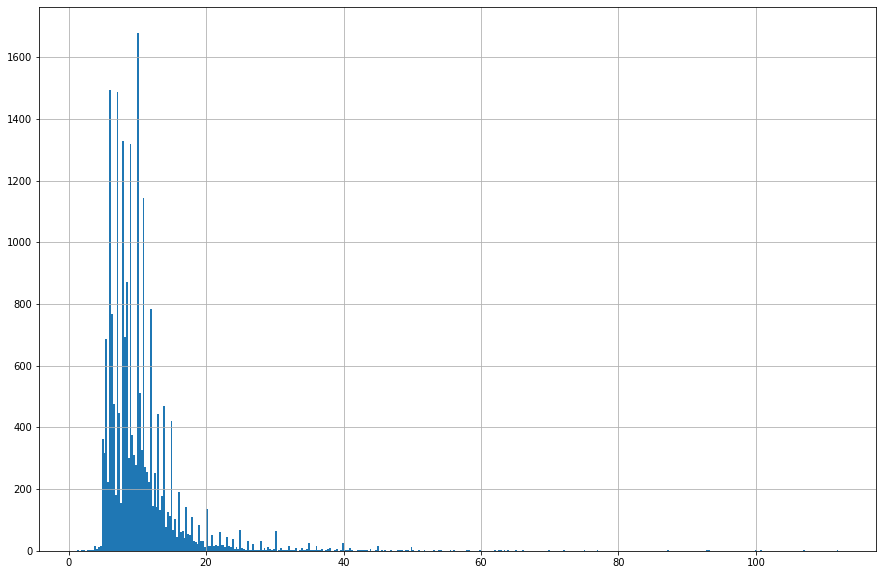

In [169]:
# Вывод гистограммы столбца
data['kitchen_area'].hist(bins=409, figsize=(15, 10))

<AxesSubplot:>

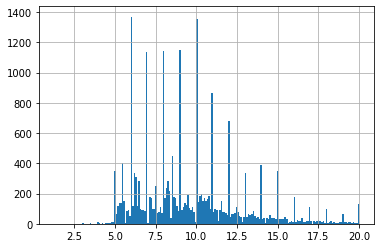

In [170]:
# Вывод гистограммы основной части данных столбца
data.query('kitchen_area <= 20')['kitchen_area'].hist(bins=200)

<AxesSubplot:>

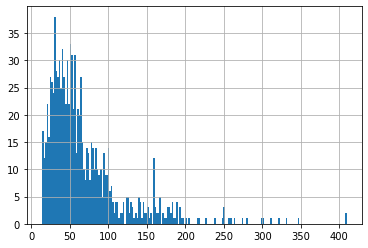

In [171]:
# Вывод гистограммы "хвоста" данных столбца
data.query('kitchen_area > 20')['living_area'].hist(bins=200)

#### Изучение столбца last_price

In [172]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

count    2.281900e+04
mean     6.597008e+06
std      1.084386e+07
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

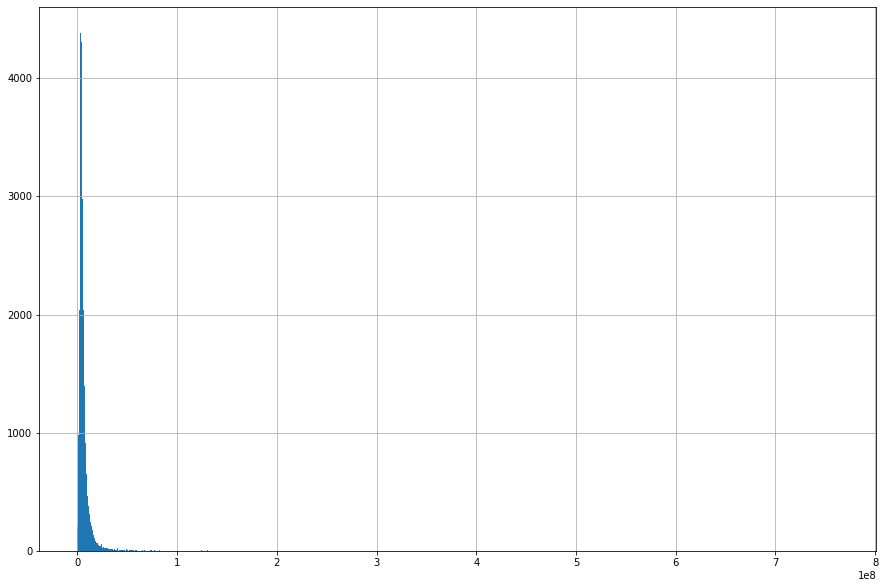

In [173]:
# Вывод гистограммы столбца
data['last_price'].hist(bins=793, figsize=(15, 10))

<AxesSubplot:>

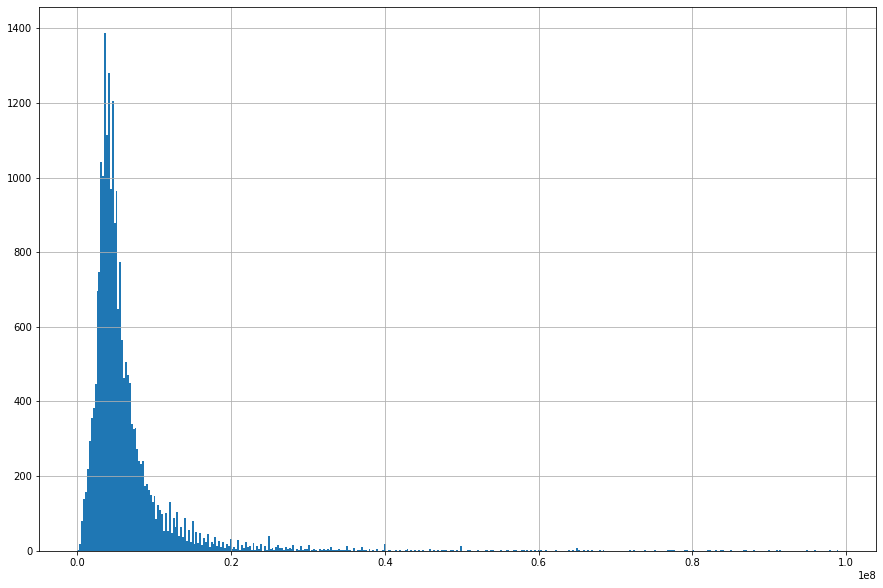

In [174]:
# Вывод гистограммы приближенно основной части данных столбца
data.query('last_price <= 1e8')['last_price'].hist(bins=400, figsize=(15, 10))

<AxesSubplot:>

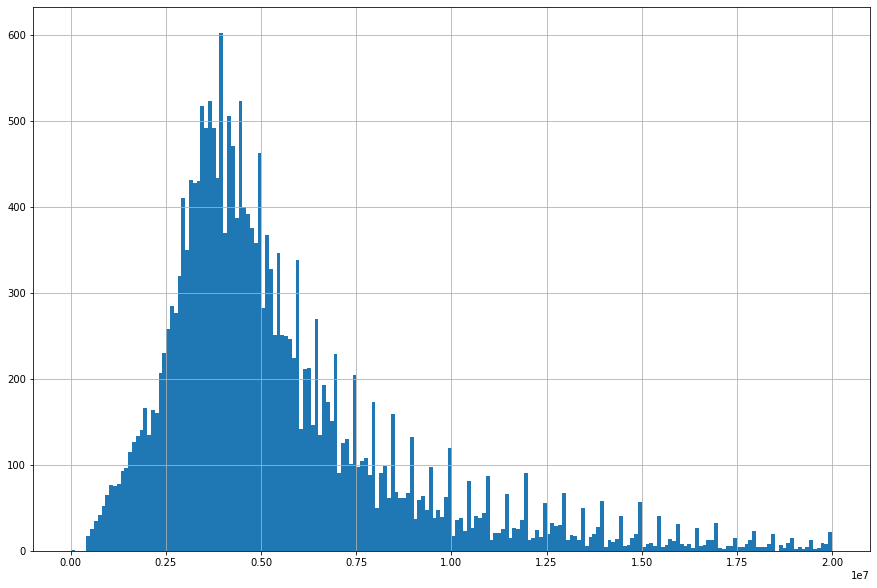

In [175]:
# Вывод гистограммы основной части данных столбца
data.query('last_price <= 0.2e8')['last_price'].hist(bins=200, figsize=(15, 10))

In [176]:
# Проверка обнаруженной аномалии
data.query('last_price <= 0.004e8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,clean_locality_type,clean_locality_type_number,clean_locality_name_number,m2_price,exposition_day_of_week,exposition_month,exposition_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
8469,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,без типа,0,0,111.834862,2,3,2019,последний,0.293578,0.37156


In [177]:
# Очистка данных от аномалии
data = data.query('last_price > 0.004e8')

# Проверка результатов очистки
len(data.query('last_price <= 0.004e8'))

0

<AxesSubplot:>

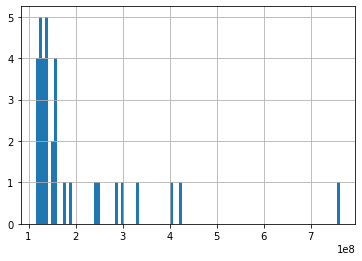

In [178]:
# Вывод гистограммы "хвоста" данных столбца
data.query('last_price > 1e8')['last_price'].hist(bins=100)

<AxesSubplot:>

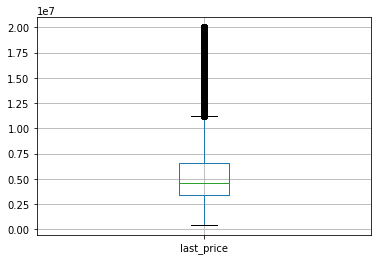

In [179]:
data.query('last_price <= 0.2e8').boxplot(column='last_price')

#### Изучение столбца rooms

In [180]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

count    22818.000000
mean         2.106626
std          1.064176
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

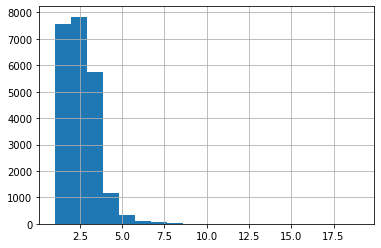

In [181]:
# Вывод гистограммы столбца
data['rooms'].hist(bins=19)

<AxesSubplot:>

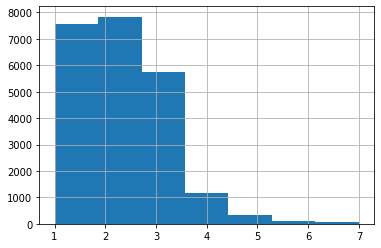

In [182]:
# Вывод гистограммы основной части данных столбца
data.query('rooms <= 7')['rooms'].hist(bins=7)

<AxesSubplot:>

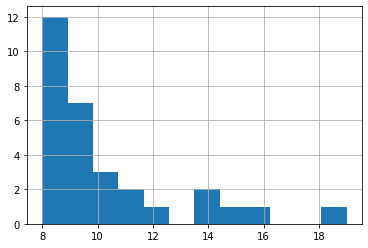

In [183]:
# Вывод гистограммы "хвоста" данных столбца
data.query('rooms > 7')['rooms'].hist(bins=12)

#### Изучение столбца ceiling_height

In [184]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

count    19256.000000
mean         2.721891
std          0.262552
min          2.500000
25%          2.540000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

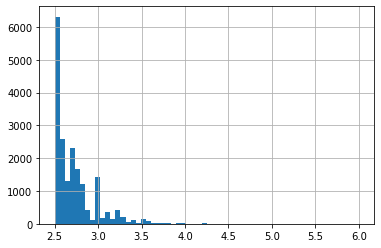

In [185]:
# Вывод гистограммы столбца
data['ceiling_height'].hist(bins=60)

<AxesSubplot:>

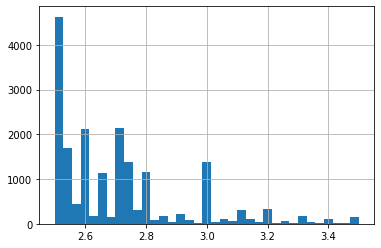

In [186]:
# Вывод гистограммы основной части данных столбца
data.query('ceiling_height <= 3.5')['ceiling_height'].hist(bins=35)

<AxesSubplot:>

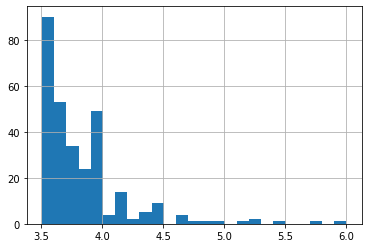

In [187]:
# Вывод гистограммы "хвоста" данных столбца
data.query('ceiling_height > 3.5')['ceiling_height'].hist(bins=25)

### Анализ времени продажи квартиры

In [188]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19712.000000
mean       182.128703
std        221.146933
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

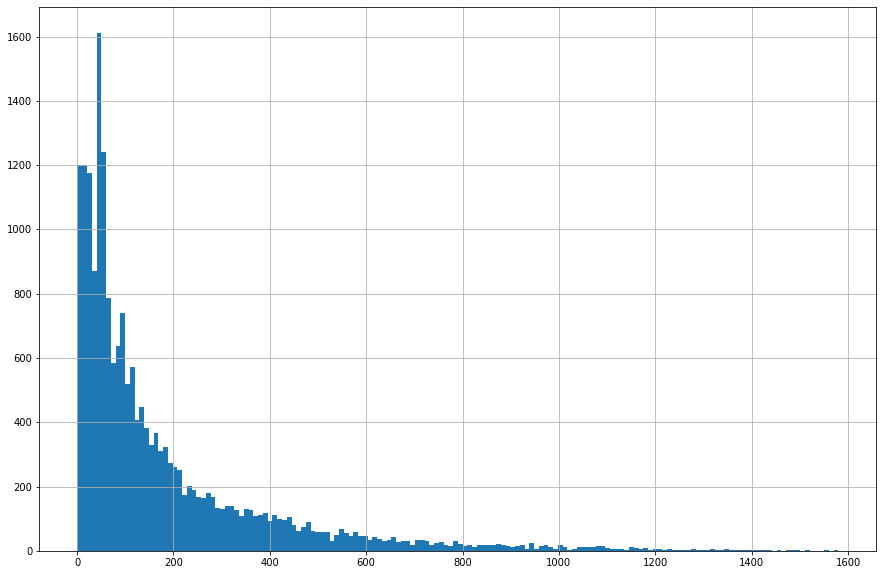

In [189]:
# Вывод гистограммы столбца
data['days_exposition'].hist(bins=160, figsize=(15, 10))

<AxesSubplot:>

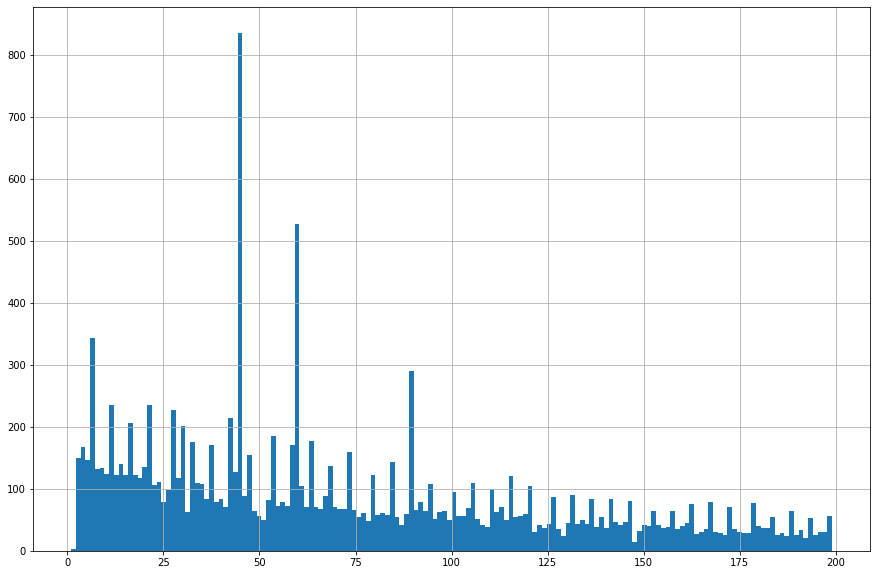

In [190]:
# Вывод гистограммы основной части данных столбца
data.query('days_exposition < 200')['days_exposition'].hist(bins=160, figsize=(15, 10))

<AxesSubplot:>

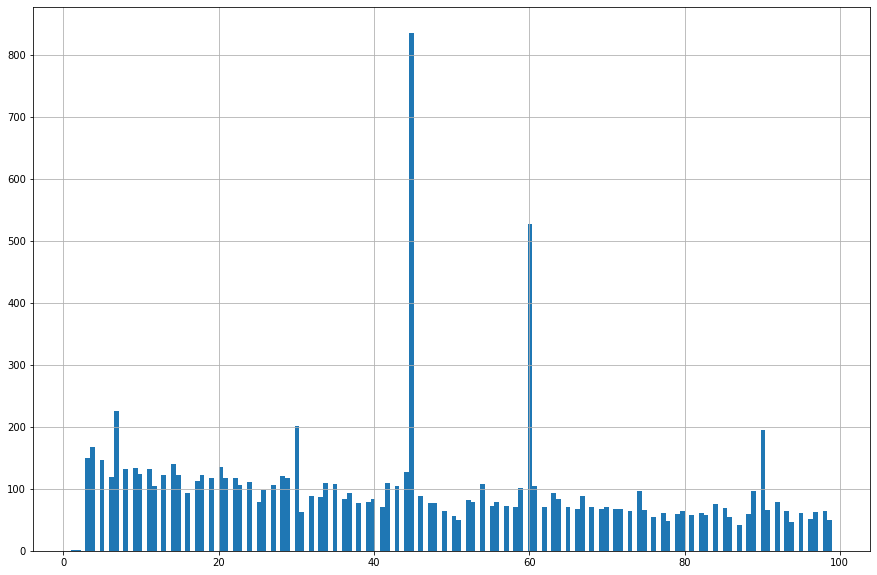

In [191]:
# Вывод гистограммы для подробного исследования всплесков
data.query('days_exposition < 100')['days_exposition'].hist(bins=160, figsize=(15, 10))

In [192]:
# Вывод среднего и медианы
print('Среднее - {:.1f}'.format(data['days_exposition'].mean()))
print('Медиана - {:.0f}'.format(data['days_exposition'].median()))

Среднее - 182.1
Медиана - 96


<AxesSubplot:>

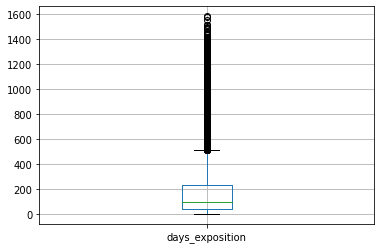

In [193]:
# Вывод диаграммы размаха столбца
data.boxplot(column='days_exposition')

### Удаление редких и выбивающихся значений

In [194]:
# Функция для получения столбца без аномалий (outliers)
# column_name - (String) Название столбца
# возвращает - (DataFrame) Датафрейм с удаленными аномалиями 
def delete_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))
    
    maximum = data[column_name].quantile(.75) + iqr
    minimum = data[column_name].quantile(.25) - iqr
    
    return data[(minimum <= data[column_name]) & (data[column_name] <= maximum)][column_name]

In [195]:
def count_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))
    
    maximum = data[column_name].quantile(.75) + iqr
    print('Максимум -', maximum)
    
    minimum = data[column_name].quantile(.25) - iqr
    print('Минимум -', minimum)
    
    outliers = len(data.query(column_name + ' < @minimum or ' + column_name + ' > @maximum'))
    
    print('Количество аутлаеров - {} ({:.2%})'.format(outliers, outliers / len(data.query('~' + column_name + '.isnull()'))))

#### Столбец total_images

In [196]:
# Вывод основных статистических параметров столбца
data['total_images'].describe()

count    22818.000000
mean         9.934657
std          5.689661
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<AxesSubplot:>

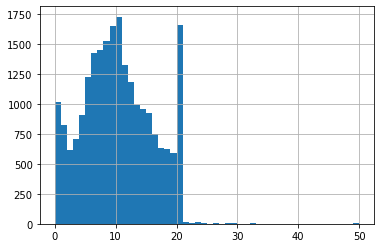

In [197]:
# Визуальная оценка распределения данных
data['total_images'].hist(bins=50)

<AxesSubplot:>

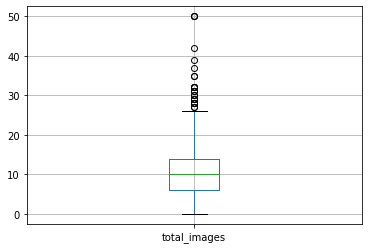

In [198]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_images')

In [199]:
# Оценка количества аутлаеров
count_outliers('total_images')

Максимум - 26.0
Минимум - -6.0
Количество аутлаеров - 25 (0.11%)


In [200]:
delete_outliers('total_images')

0        20
1         7
2        10
3         0
4         2
         ..
22814     9
22815     9
22816    14
22817    18
22818    13
Name: total_images, Length: 22793, dtype: int64

<AxesSubplot:>

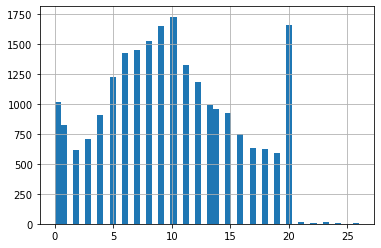

In [201]:
# Удаление аутлаеров
data['total_images'] = delete_outliers('total_images')

# Проверка результатов удаления
data['total_images'].hist(bins=50)

#### Столбец last_price

In [202]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

count    2.281800e+04
mean     6.597297e+06
std      1.084401e+07
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

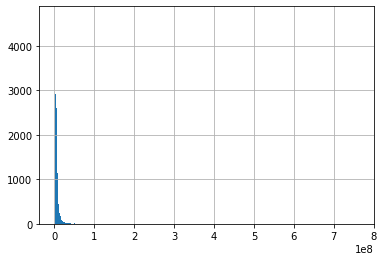

In [203]:
# Визуальная оценка распределения данных
data['last_price'].hist(bins=800)

<AxesSubplot:>

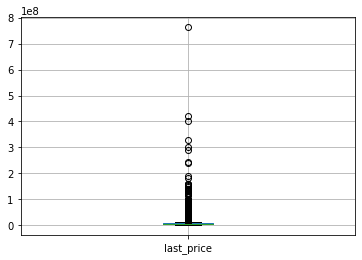

In [204]:
# Визуальная проверка наличия аномалий
data.boxplot(column='last_price')

In [205]:
# Оценка количества аутлаеров
count_outliers('last_price')

Максимум - 11875000.0
Минимум - -1525000.0
Количество аутлаеров - 2023 (8.87%)


#### Столбец total_area

In [206]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

count    22818.000000
mean        61.003615
std         34.877453
min         28.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

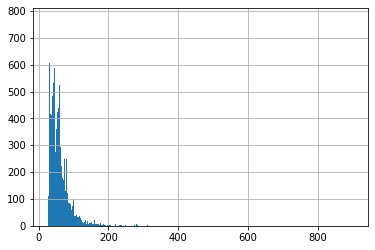

In [207]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

<AxesSubplot:>

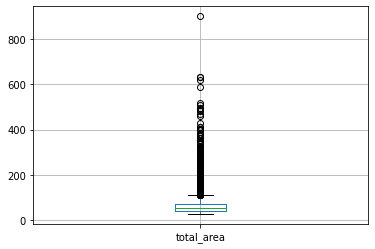

In [208]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_area')

In [209]:
# Оценка количества аутлаеров
count_outliers('total_area')

Максимум - 113.5
Минимум - -2.5
Количество аутлаеров - 1252 (5.49%)


#### Столбец rooms

In [210]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

count    22818.000000
mean         2.106626
std          1.064176
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

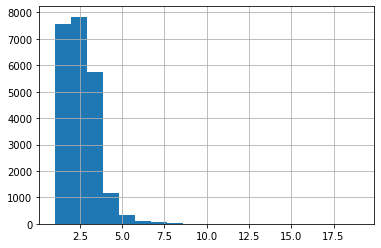

In [211]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=19)

<AxesSubplot:>

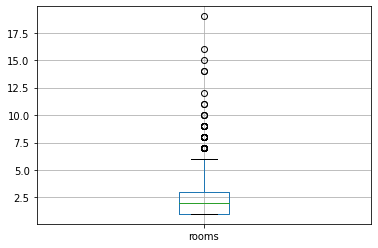

In [212]:
# Визуальная проверка наличия аномалий
data.boxplot(column='rooms')

In [213]:
# Оценка количества аутлаеров
count_outliers('rooms')

Максимум - 6.0
Минимум - -2.0
Количество аутлаеров - 87 (0.38%)


<AxesSubplot:>

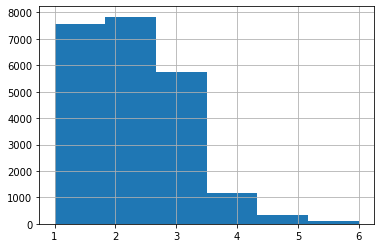

In [214]:
# Удаление аутлаеров
data['rooms'] = delete_outliers('rooms')

# Проверка результатов удаления
data['rooms'].hist(bins=6)

#### Столбец ceiling_height

In [215]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

count    19256.000000
mean         2.721891
std          0.262552
min          2.500000
25%          2.540000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

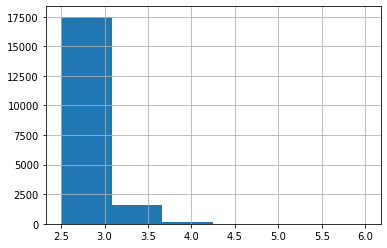

In [216]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=6)

<AxesSubplot:>

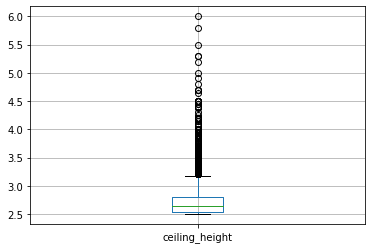

In [217]:
# Визуальная проверка наличия аномалий
data.boxplot(column='ceiling_height')

In [218]:
# Оценка количества аутлаеров
count_outliers('ceiling_height')

Максимум - 3.1899999999999995
Минимум - 2.1500000000000004
Количество аутлаеров - 1264 (6.56%)


#### Столбец floors_total

In [219]:
# Вывод основных статистических параметров столбца
data['floors_total'].describe()

count    22818.000000
mean        10.576606
std          6.527722
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

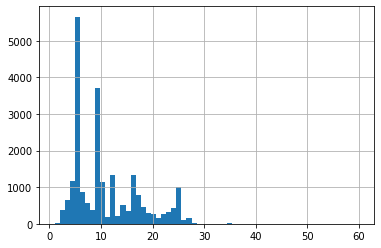

In [220]:
# Визуальная оценка распределения данных
data['floors_total'].hist(bins=60)

<AxesSubplot:>

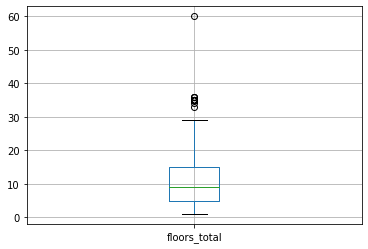

In [221]:
# Визуальная проверка наличия аномалий
data.boxplot(column='floors_total')

In [222]:
# Оценка количества аутлаеров
count_outliers('floors_total')

Максимум - 30.0
Минимум - -10.0
Количество аутлаеров - 28 (0.12%)


<AxesSubplot:>

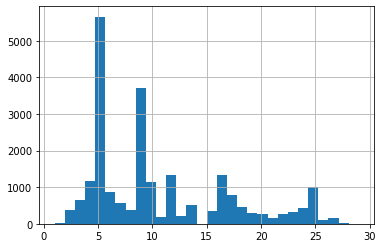

In [223]:
# Удаление аутлаеров
data['floors_total'] = delete_outliers('floors_total')

# Проверка результатов удаления
data['floors_total'].hist(bins=30)

#### Столбец living_area

In [224]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    22818.000000
mean        35.031578
std         22.053395
min         14.000000
25%         19.000000
50%         30.300000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

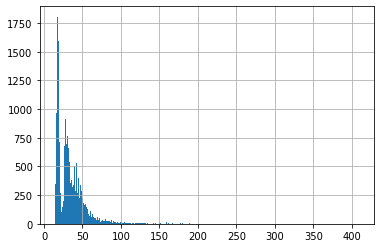

In [225]:
# Визуальная оценка распределения данных
data['living_area'].hist(bins=409)

<AxesSubplot:>

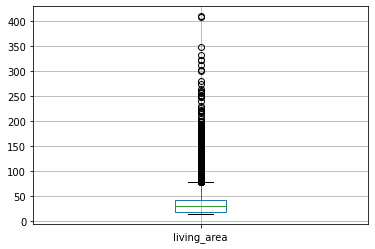

In [226]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_area')

In [227]:
# Оценка количества аутлаеров
count_outliers('living_area')

Максимум - 78.5
Минимум - -16.699999999999996
Количество аутлаеров - 819 (3.59%)


#### Столбец kitchen_area

In [228]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    22110.000000
mean        10.486917
std          5.784877
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

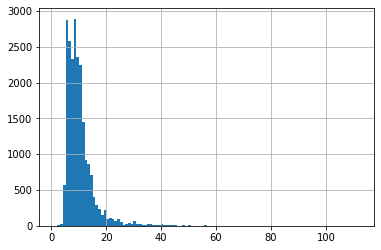

In [229]:
# Визуальная оценка распределения данных
data['kitchen_area'].hist(bins=112)

<AxesSubplot:>

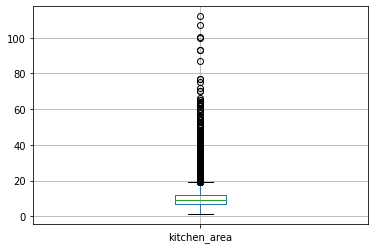

In [230]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_area')

In [231]:
# Оценка количества аутлаеров
count_outliers('kitchen_area')

Максимум - 19.25
Минимум - -0.35000000000000053
Количество аутлаеров - 1184 (5.36%)


#### Столбец balcony

In [232]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

count    22818.000000
mean         0.594005
std          0.962934
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

<AxesSubplot:>

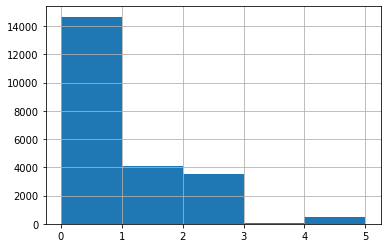

In [233]:
# Визуальная оценка распределения данных
data['balcony'].hist(bins=5)

<AxesSubplot:>

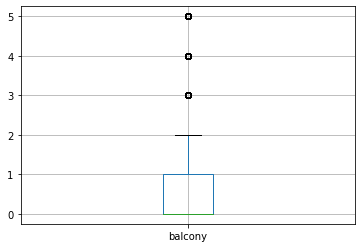

In [234]:
# Визуальная проверка наличия аномалий
data.boxplot(column='balcony')

In [235]:
# Оценка количества аутлаеров
count_outliers('balcony')

Максимум - 2.5
Минимум - -1.5
Количество аутлаеров - 559 (2.45%)


#### Столбец airports_nearest

In [236]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

count    17584.000000
mean     28825.531477
std      12607.069324
min          0.000000
25%      18585.000000
50%      26773.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

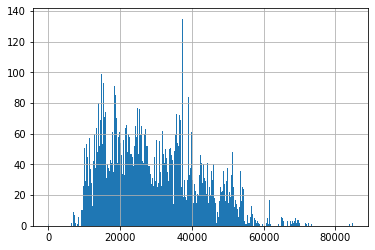

In [237]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=800)

<AxesSubplot:>

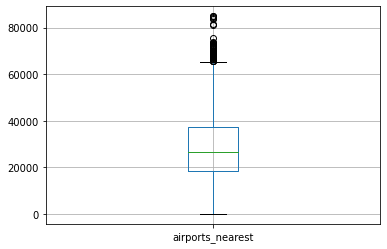

In [238]:
# Визуальная проверка наличия аномалий
data.boxplot(column='airports_nearest')

In [239]:
# Оценка количества аутлаеров
count_outliers('airports_nearest')

Максимум - 65397.5
Минимум - -9502.5
Количество аутлаеров - 99 (0.56%)


<AxesSubplot:>

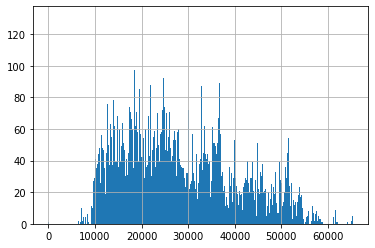

In [240]:
# Удаление аутлаеров
data['airports_nearest'] = delete_outliers('airports_nearest')

# Проверка результатов удаления
data.query('airports_nearest != -1')['airports_nearest'].hist(bins=650)

#### Столбец city_сenters_nearest

In [241]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

count    17608.000000
mean     14197.257752
std       8634.175101
min        181.000000
25%       9241.000000
50%      13090.000000
75%      16268.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:>

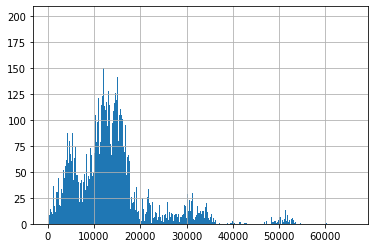

In [242]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=800)

<AxesSubplot:>

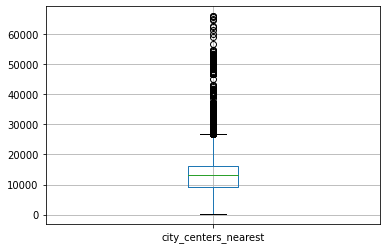

In [243]:
# Визуальная проверка наличия аномалий
data.boxplot(column='city_сenters_nearest')

In [244]:
# Оценка количества аутлаеров
count_outliers('city_сenters_nearest')

Максимум - 26808.5
Минимум - -1299.5
Количество аутлаеров - 1699 (9.65%)


#### Столбец days_exposition

In [245]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19712.000000
mean       182.128703
std        221.146933
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

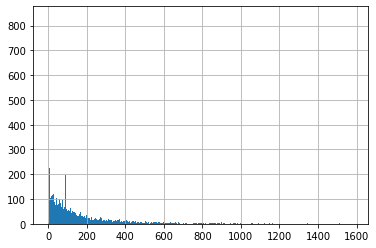

In [246]:
# Визуальная оценка распределения данных
data['days_exposition'].hist(bins=1580)

<AxesSubplot:>

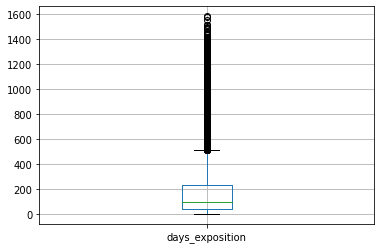

In [247]:
# Визуальная проверка наличия аномалий
data.query('days_exposition != -1').boxplot(column='days_exposition')

In [248]:
# Оценка количества аутлаеров
count_outliers('days_exposition')

Максимум - 515.0
Минимум - -237.0
Количество аутлаеров - 1615 (8.19%)


In [249]:
# Оценка корреляции столбца с другими
data.corr()['days_exposition'].sort_values()

exposition_year              -0.613922
ponds_nearest                -0.080614
city_сenters_nearest         -0.061301
floors_total                 -0.050658
kitchen_total_area_ratio     -0.041226
floor                        -0.036397
exposition_month             -0.029433
total_images                 -0.029091
exposition_day_of_week       -0.028720
balcony                      -0.027962
airports_nearest             -0.021813
open_plan                    -0.012247
studio                       -0.011599
clean_locality_type_number   -0.000953
clean_locality_name_number    0.003969
living_total_area_ratio       0.012950
apartment                     0.020699
parks_nearest                 0.021699
m2_price                      0.047650
parks_around_3000             0.054032
ponds_around_3000             0.064292
last_price                    0.079606
kitchen_area                  0.103631
rooms                         0.121878
ceiling_height                0.129866
living_area              

<AxesSubplot:xlabel='days_exposition', ylabel='exposition_year'>

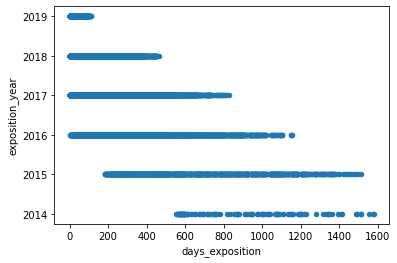

In [250]:
# Оценка степени корреляции длительности размешения объявления и года выставления объявления
data.plot(x='days_exposition', y='exposition_year', kind='scatter')

<AxesSubplot:xlabel='days_exposition', ylabel='first_day_exposition'>

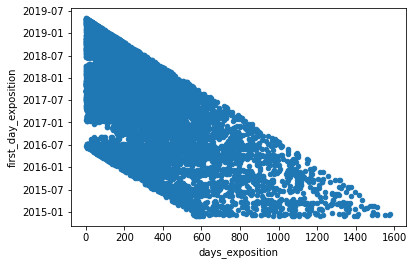

In [251]:
# Оценка степени корреляции длительности размешения объявления и даты выставления объявления
data.plot(x='days_exposition', y='first_day_exposition', kind='scatter')

#### Столбец m2_price

In [252]:
# Вывод основных статистических параметров столбца
data['m2_price'].describe()

count    2.281800e+04
mean     9.914948e+04
std      5.049370e+04
min      7.962963e+03
25%      7.629519e+04
50%      9.473684e+04
75%      1.138704e+05
max      1.907500e+06
Name: m2_price, dtype: float64

<AxesSubplot:>

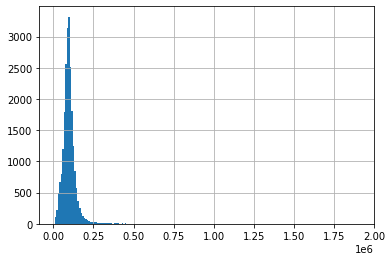

In [253]:
# Визуальная оценка распределения данных
data['m2_price'].hist(bins=200)

<AxesSubplot:>

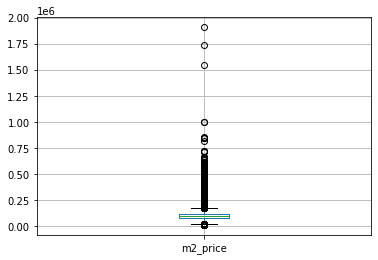

In [254]:
# Визуальная проверка наличия аномалий
data.boxplot(column='m2_price')

In [255]:
# Оценка количества аутлаеров
count_outliers('m2_price')

Максимум - 170233.14506174868
Минимум - 19932.41634202707
Количество аутлаеров - 1056 (4.63%)


#### Столбец living_total_area_ratio

In [256]:
# Вывод основных статистических параметров столбца
data['living_total_area_ratio'].describe()

count    22818.000000
mean         0.565466
std          0.099885
min          0.162860
25%          0.498641
50%          0.567308
75%          0.635290
max          0.983447
Name: living_total_area_ratio, dtype: float64

<AxesSubplot:>

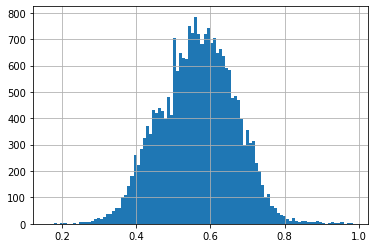

In [257]:
# Визуальная оценка распределения данных
data['living_total_area_ratio'].hist(bins=100)

<AxesSubplot:>

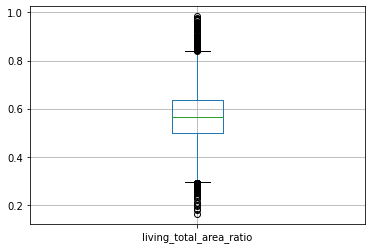

In [258]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_total_area_ratio')

In [259]:
# Оценка количества аутлаеров
count_outliers('living_total_area_ratio')

Максимум - 0.8402636305895359
Минимум - 0.29366786070413076
Количество аутлаеров - 151 (0.66%)


#### Столбец kitchen_total_area_ratio

In [260]:
# Вывод основных статистических параметров столбца
data['kitchen_total_area_ratio'].describe()

count    22110.000000
mean         0.185186
std          0.068949
min          0.025381
25%          0.133333
50%          0.171260
75%          0.229317
max          0.787879
Name: kitchen_total_area_ratio, dtype: float64

<AxesSubplot:>

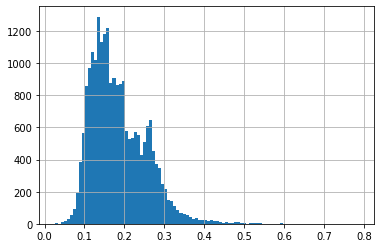

In [261]:
# Визуальная оценка распределения данных
data['kitchen_total_area_ratio'].hist(bins=100)

<AxesSubplot:>

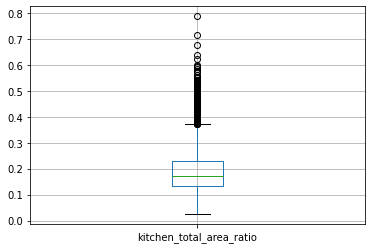

In [262]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_total_area_ratio')

In [263]:
# Оценка количества аутлаеров
count_outliers('kitchen_total_area_ratio')

Максимум - 0.37329268292682927
Минимум - -0.010642276422764246
Количество аутлаеров - 294 (1.33%)


### Исследование цены квартир

In [264]:
# Оценка корреляции цены квартиры с другими показателями
data.corr()['last_price'].sort_values()

city_сenters_nearest         -0.207600
clean_locality_name_number   -0.135500
clean_locality_type_number   -0.109564
kitchen_total_area_ratio     -0.086969
ponds_nearest                -0.084478
exposition_year              -0.041153
airports_nearest             -0.024751
parks_nearest                -0.015270
studio                       -0.011819
open_plan                    -0.004240
floors_total                 -0.001320
exposition_day_of_week        0.000779
living_total_area_ratio       0.001731
exposition_month              0.003542
balcony                       0.009756
apartment                     0.028289
floor                         0.029946
days_exposition               0.079606
total_images                  0.105084
parks_around_3000             0.198780
ponds_around_3000             0.208945
rooms                         0.367483
ceiling_height                0.411078
kitchen_area                  0.527834
living_area                   0.572739
total_area               

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

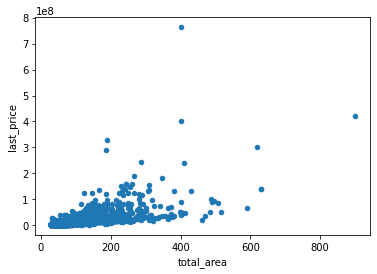

In [265]:
# Оценка корреляции цены квартиры с ее площадью
data.plot(x='total_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

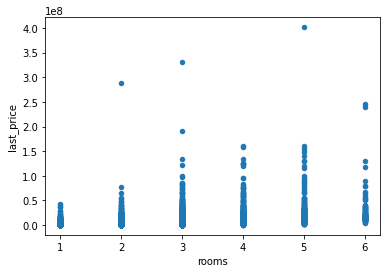

In [266]:
# Оценка корреляции цены квартиры с количеством комнат в ней
data.plot(x='rooms', y='last_price', kind='scatter')

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

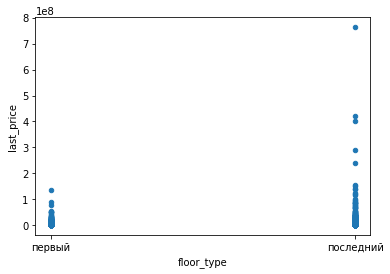

In [267]:
# Оценка корреляции цены квартиры с типом ее этажа (первый или последний)
data.query('floor_type != "другой"').plot(x='floor_type', y='last_price', kind='scatter')

In [268]:
# Определение уникальных типов этажей
unique_types = list(data['floor_type'].unique())

# Функция для получения цифрового представления типа этажа
# type - (string) Тип этажа
# возвращает - (string) Цифровое представления типа этажа
def get_floot_type_number(type):
    return unique_types.index(type)

In [269]:
# Создание столбца с цифровым представлением типа этажа
data['floor_type_number'] = data['floor_type'].apply(get_floot_type_number)

# Проверка результатов создания
data.groupby('floor_type')['floor_type_number'].value_counts()

floor_type  floor_type_number
другой      0                    16790
первый      1                     2784
последний   2                     3244
Name: floor_type_number, dtype: int64

<AxesSubplot:xlabel='floor_type_number', ylabel='last_price'>

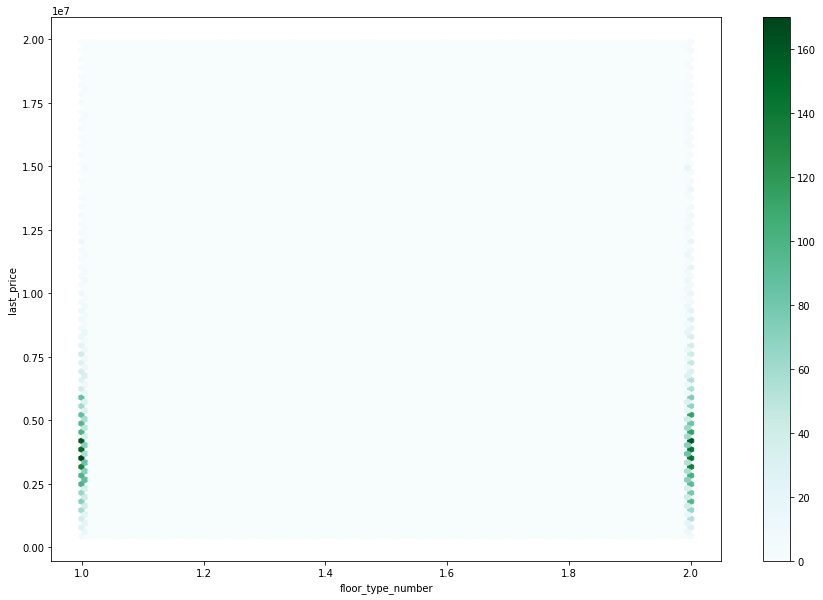

In [270]:
# Оценка распределения цены квартиры для двух типов этажей
data.query('floor_type_number != 0 and last_price < 0.2e8').plot(x='floor_type_number', y='last_price', kind='hexbin', sharex=False, figsize=(15, 10))

<AxesSubplot:xlabel='city_сenters_nearest', ylabel='last_price'>

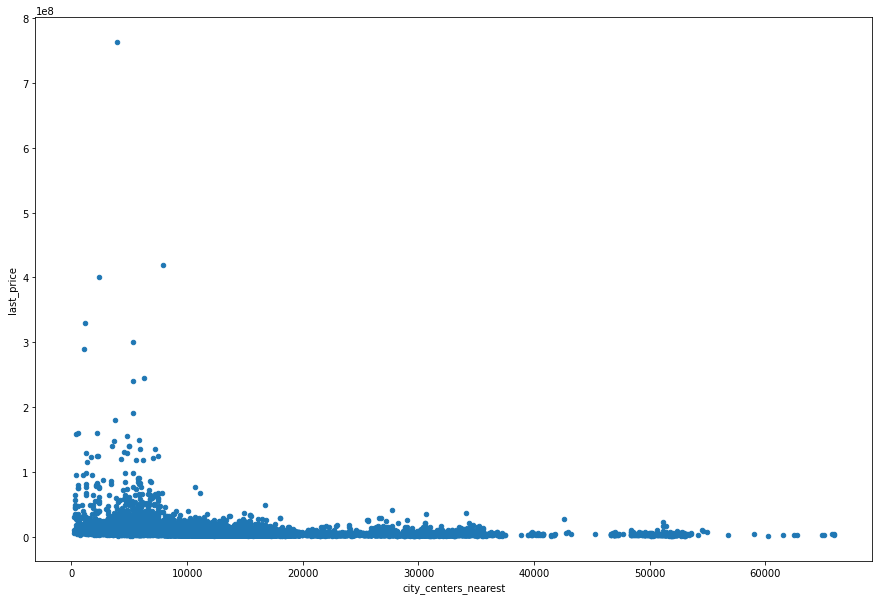

In [271]:
# Оценка корреляции цены квартиры с ее удаленностью от центра
data.plot(x='city_сenters_nearest', y='last_price', kind='scatter', figsize=(15, 10))

<AxesSubplot:xlabel='exposition_day_of_week', ylabel='last_price'>

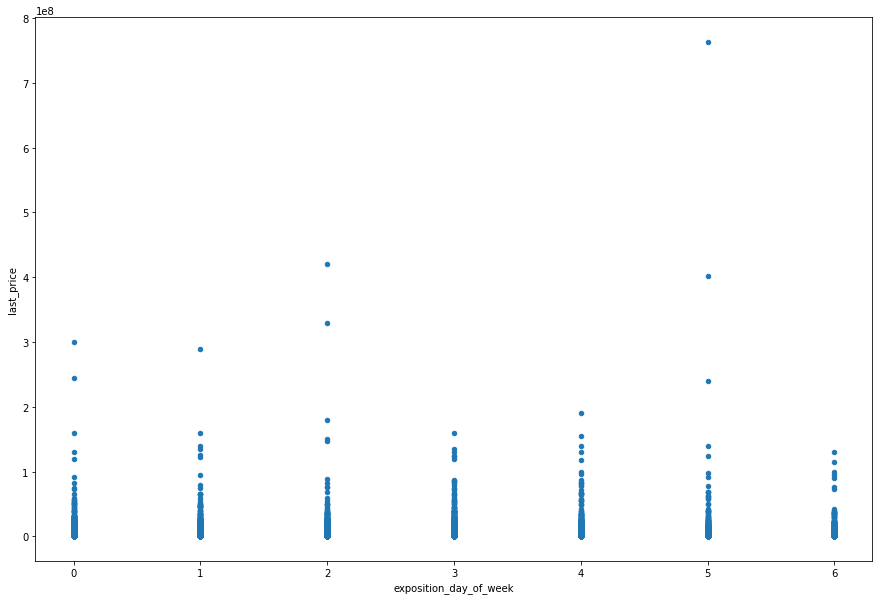

In [272]:
# Оценка корреляции цены квартиры с днем недели публикации объявления
data.plot(x='exposition_day_of_week', y='last_price', kind='scatter', figsize=(15, 10))

<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

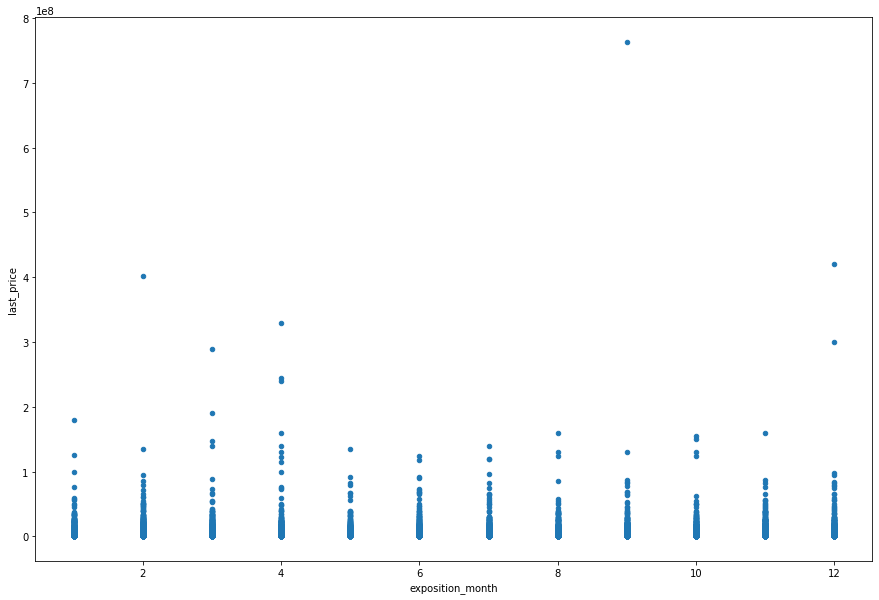

In [273]:
# Оценка корреляции цены квартиры с месяцем публикации объявления
data.plot(x='exposition_month', y='last_price', kind='scatter', figsize=(15, 10))

<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

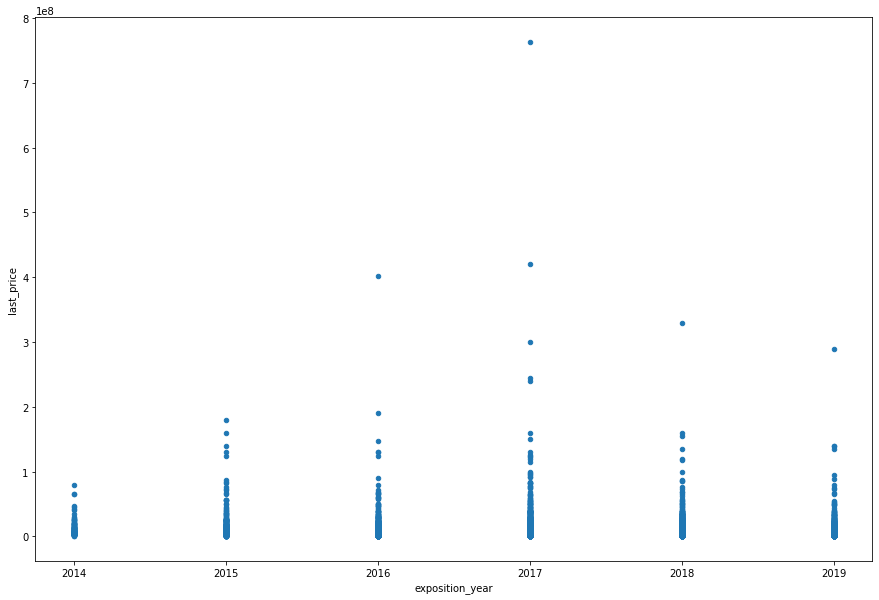

In [274]:
# Оценка корреляции цены квартиры с годом публикации объявления
data.plot(x='exposition_year', y='last_price', kind='scatter', figsize=(15, 10))

In [275]:
# Создание сводной таблицы с количеством квартир в каждом населенном пункте
# и средней стоимости квадратного метра в этих квартирах
highest_ads_number_locations = data.pivot_table(index='clean_locality_name', values='m2_price', aggfunc=['count', 'mean'])

# Проверка результатов создания
highest_ads_number_locations

,count,mean
,m2_price,m2_price
clean_locality_name,,
Бокситогорск,16,17551.591819
Волосово,36,40183.325974
Волхов,110,35084.344735
Всеволожск,382,68697.162732
Выборг,229,57804.311853
...,...,...
село Путилово,2,39921.758208
село Рождествено,3,37733.159586


In [276]:
# Переименование столбцов для лучшей читабельности
highest_ads_number_locations.columns = ['count', 'm2_mean']

# Выделение 10 населенных пунктов с наибольшим числом объявлений
ten_highest_ads_number_locations = highest_ads_number_locations.sort_values(by='count', ascending=False).head(10)

# Вывод полученных населенных пунктов
ten_highest_ads_number_locations

,count,m2_mean
clean_locality_name,,
Санкт-Петербург,15256,114525.253153
поселок Мурино,472,84137.751248
поселок Шушары,418,77419.870906
Всеволожск,382,68697.162732
Пушкин,363,103093.458208
Колпино,333,75317.833338
Гатчина,305,68974.578831
поселок Парголово,304,89756.931819
деревня Кудрово,266,91771.148595


In [277]:
# Вывод среднего значения цены квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
ten_highest_ads_number_locations['m2_mean'].mean()

83149.83006833421

In [278]:
# Населённый пункт с самой высокой стоимостью жилья
highest_ads_number_locations.sort_values(by='m2_mean', ascending=False).head(1)

,count,m2_mean
clean_locality_name,,
Зеленогорск,22,117519.104501


In [279]:
# Населённый пункт с самой низкой стоимостью жилья
highest_ads_number_locations.sort_values(by='m2_mean', ascending=False).tail(1)

,count,m2_mean
clean_locality_name,,
деревня Старополье,3,11206.221198


### Определение центра города

<AxesSubplot:>

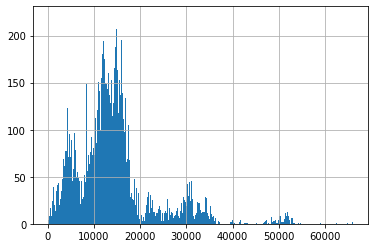

In [280]:
# Оценка распределения расстояния до центра
data['city_сenters_nearest'].hist(bins=600)

<AxesSubplot:>

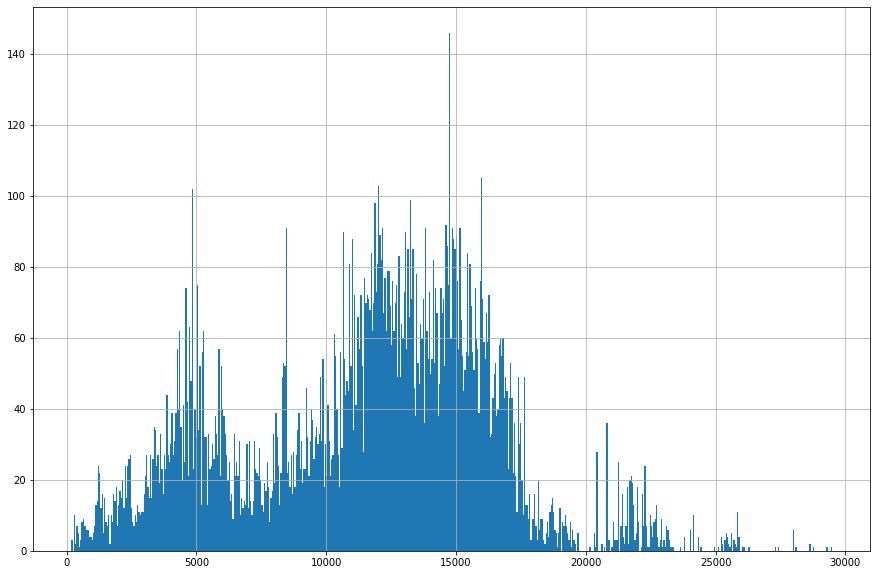

In [281]:
# Оценка распределения расстояния до центра в Санкт-Петербурге
data.query('clean_locality_name == "Санкт-Петербург"')['city_сenters_nearest'].hist(bins=600, figsize=(15, 10))

<AxesSubplot:>

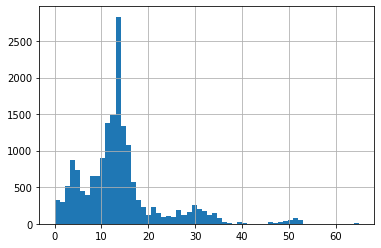

In [282]:
# Расчет расстояния до центра в километрах
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] // 1000

# Результаты расчета
data['city_сenters_nearest_km'].hist(bins=60)

<AxesSubplot:xlabel='city_сenters_nearest_km'>

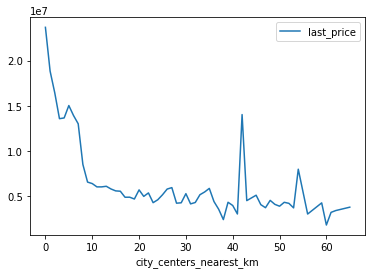

In [283]:
# График зависимости цены от удаленности от центра
(
    data
    .pivot_table(index='city_сenters_nearest_km', values='last_price')
    .plot()
)

### Анализ квартир в центре города

In [284]:
data_center = data[data['city_сenters_nearest_km'] <= 10]

#### Площадь

In [285]:
data_center['total_area'].describe()

count    5816.000000
mean       80.301068
std        51.663790
min        28.000000
25%        47.000000
50%        67.700000
75%        95.125000
max       900.000000
Name: total_area, dtype: float64

In [286]:
data['total_area'].describe()

count    22818.000000
mean        61.003615
std         34.877453
min         28.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

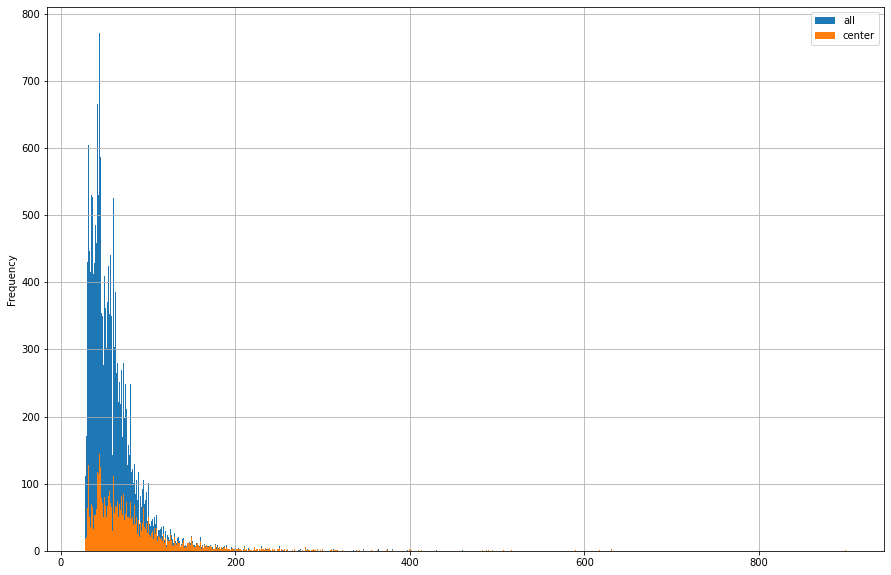

In [287]:
ax = data.plot(kind='hist', y='total_area', bins=900, label='all', figsize=(15, 10))
data_center.plot(kind='hist', y='total_area', bins=900, label='center', ax=ax, grid=True, legend=True)

<AxesSubplot:ylabel='Frequency'>

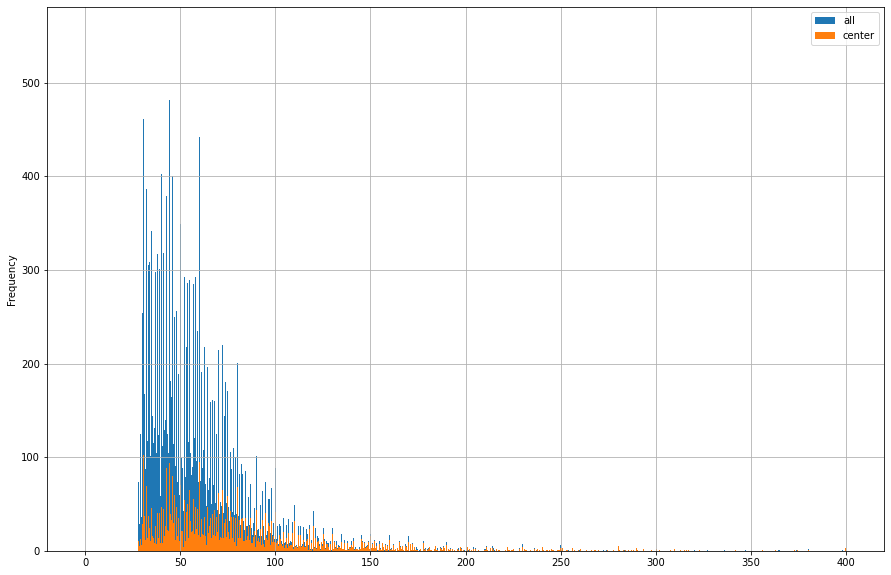

In [288]:
ax = data.plot(kind='hist', y='total_area', bins=900, range=(0, 400), label='all', figsize=(15, 10))
data_center.plot(kind='hist', y='total_area', bins=900, range=(0, 400), label='center', ax=ax, grid=True, legend=True)

#### Цена

In [289]:
data_center['last_price'].describe()

count    5.816000e+03
mean     1.179952e+07
std      1.986434e+07
min      1.800000e+06
25%      5.300000e+06
50%      7.693500e+06
75%      1.200000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [290]:
data['last_price'].describe()

count    2.281800e+04
mean     6.597297e+06
std      1.084401e+07
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [291]:
data_center['last_price'].mean() / data['last_price'].mean()

1.7885384759115603

<AxesSubplot:>

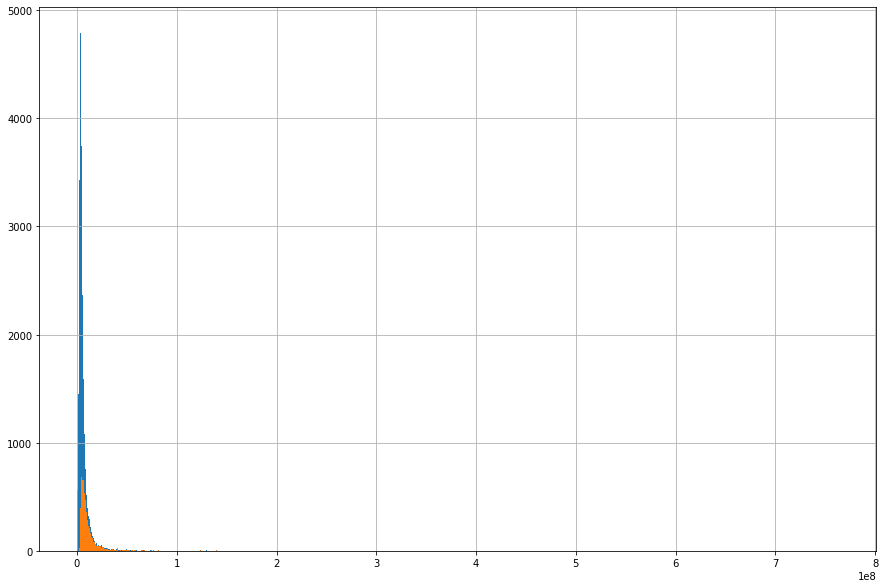

In [292]:
data['last_price'].hist(bins=763, figsize=(15, 10))
data_center['last_price'].hist(bins=763, figsize=(15, 10))

<AxesSubplot:>

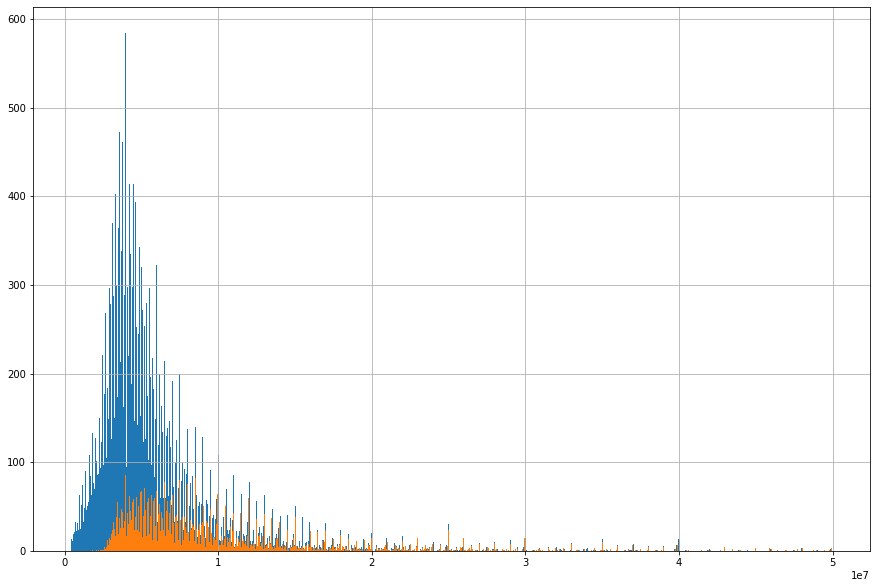

In [293]:
data.query('last_price < 0.5e8')['last_price'].hist(bins=763, figsize=(15, 10))
data_center.query('last_price < 0.5e8')['last_price'].hist(bins=763, figsize=(15, 10))

#### Число комнат

In [294]:
data_center['rooms'].describe()

count    5737.000000
mean        2.482656
std         1.139696
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [295]:
data['rooms'].describe()

count    22731.000000
mean         2.083894
std          0.991451
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

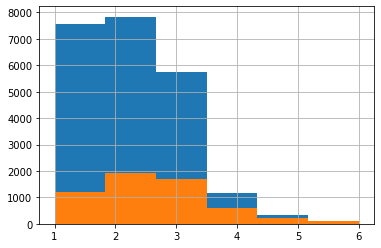

In [296]:
data['rooms'].hist(bins=6)
data_center['rooms'].hist(bins=6)

#### Высота потолков

In [297]:
data_center['ceiling_height'].describe()

count    5430.000000
mean        2.926682
std         0.349720
min         2.500000
25%         2.650000
50%         2.900000
75%         3.100000
max         6.000000
Name: ceiling_height, dtype: float64

In [298]:
data['ceiling_height'].describe()

count    19256.000000
mean         2.721891
std          0.262552
min          2.500000
25%          2.540000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

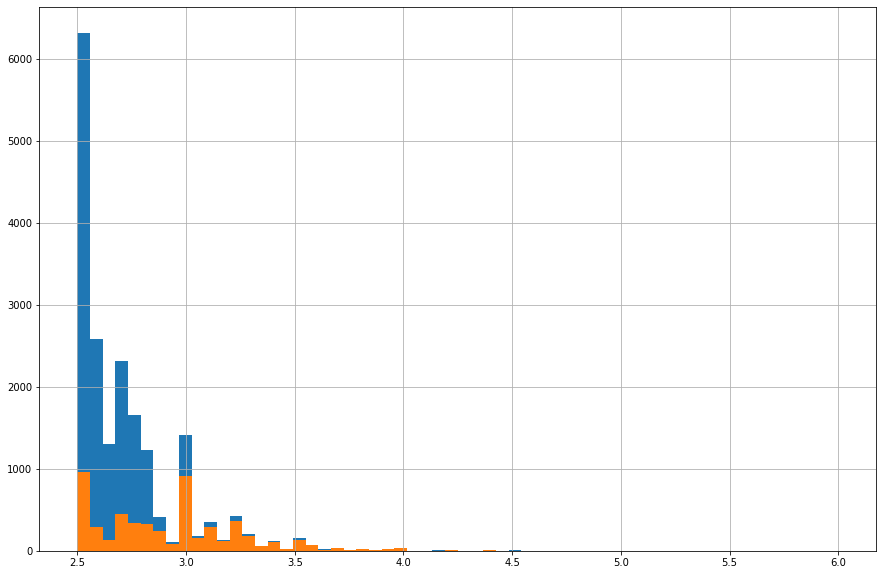

In [299]:
data['ceiling_height'].hist(bins=60, figsize=(15, 10))
data_center['ceiling_height'].hist(bins=60, figsize=(15, 10))

#### Анализ цены квартир

In [300]:
# Оценка корреляции цены квартиры с другими показателями
data.corr()['last_price'].sort_values()

city_сenters_nearest_km      -0.207646
city_сenters_nearest         -0.207600
clean_locality_name_number   -0.135500
clean_locality_type_number   -0.109564
kitchen_total_area_ratio     -0.086969
ponds_nearest                -0.084478
exposition_year              -0.041153
airports_nearest             -0.024751
parks_nearest                -0.015270
studio                       -0.011819
open_plan                    -0.004240
floor_type_number            -0.001938
floors_total                 -0.001320
exposition_day_of_week        0.000779
living_total_area_ratio       0.001731
exposition_month              0.003542
balcony                       0.009756
apartment                     0.028289
floor                         0.029946
days_exposition               0.079606
total_images                  0.105084
parks_around_3000             0.198780
ponds_around_3000             0.208945
rooms                         0.367483
ceiling_height                0.411078
kitchen_area             

In [301]:
# Оценка корреляции цены квартиры с другими показателями
data_center.corr()['last_price'].sort_values()

city_сenters_nearest_km      -0.190789
city_сenters_nearest         -0.189282
ponds_nearest                -0.089829
kitchen_total_area_ratio     -0.082082
exposition_year              -0.045652
parks_nearest                -0.029943
airports_nearest             -0.023473
floors_total                 -0.017317
living_total_area_ratio      -0.015062
studio                       -0.012399
exposition_month              0.005513
open_plan                     0.008012
exposition_day_of_week        0.013646
balcony                       0.032789
floor_type_number             0.036170
apartment                     0.042172
floor                         0.059406
days_exposition               0.078371
parks_around_3000             0.125940
total_images                  0.129886
ponds_around_3000             0.153772
ceiling_height                0.326124
rooms                         0.365533
kitchen_area                  0.526597
living_area                   0.563144
total_area               

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

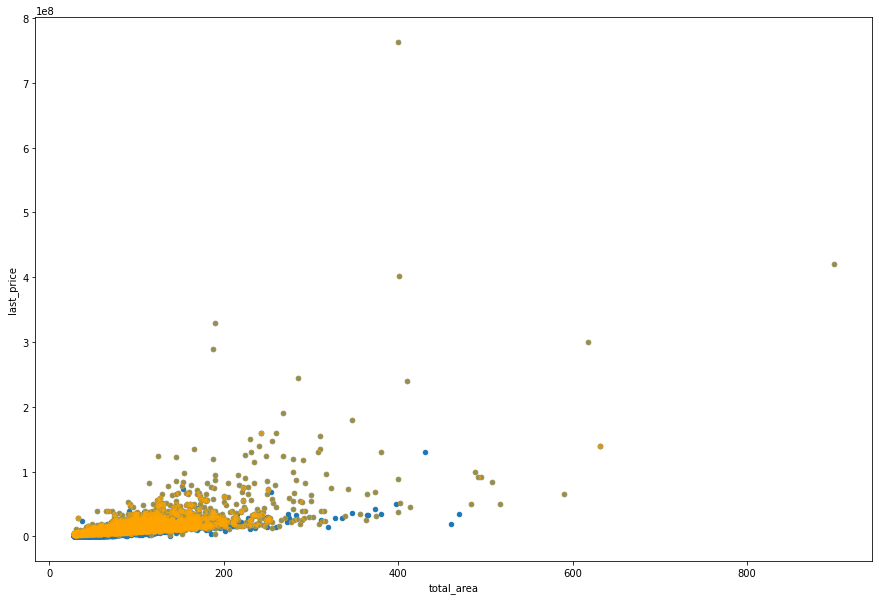

In [302]:
# Оценка корреляции цены квартиры с ее площадью
ax = data.plot(x='total_area', y='last_price', kind='scatter', sharex=False, figsize=(15, 10))
data_center.plot(x='total_area', y='last_price', kind='scatter', sharex=False, figsize=(15, 10), ax=ax, color='orange', alpha=0.5)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

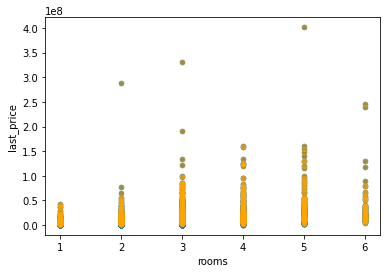

In [303]:
# Оценка корреляции цены квартиры с количеством комнат в ней
ax = data.plot(x='rooms', y='last_price', kind='scatter')
data_center.plot(x='rooms', y='last_price', kind='scatter', ax=ax, color='orange', alpha=0.5)

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

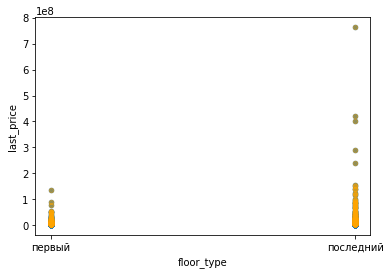

In [304]:
# Оценка корреляции цены квартиры с типом ее этажа (первый или последний)
ax = data.query('floor_type != "другой"').plot(x='floor_type', y='last_price', kind='scatter')
data_center.query('floor_type != "другой"').plot(x='floor_type', y='last_price', kind='scatter', ax=ax, color='orange', alpha=0.5)

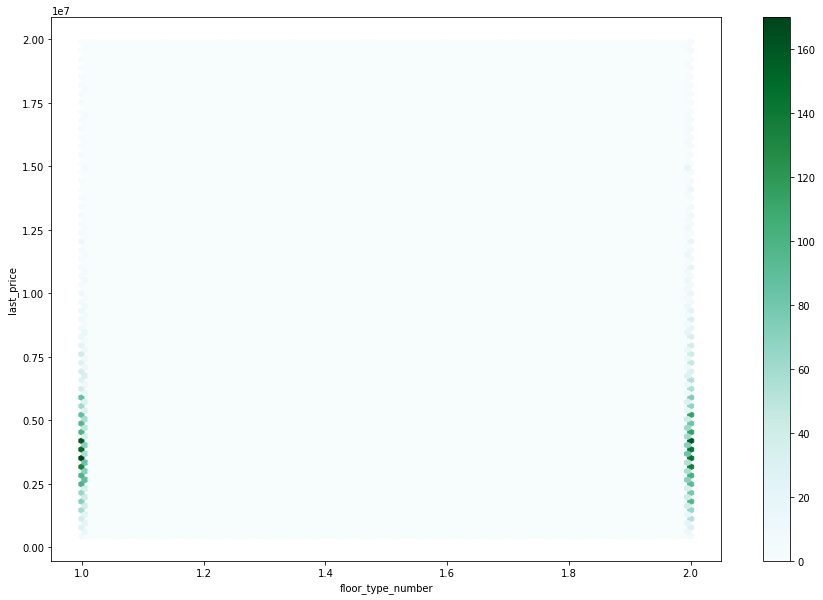

In [305]:
# Оценка распределения цены квартиры для двух типов этажей
ax = (
    data
    .query('floor_type_number != 0 and last_price < 0.2e8')
    .plot(x='floor_type_number', y='last_price', kind='hexbin', sharex=False, figsize=(15, 10))
)

<AxesSubplot:xlabel='floor_type_number', ylabel='last_price'>

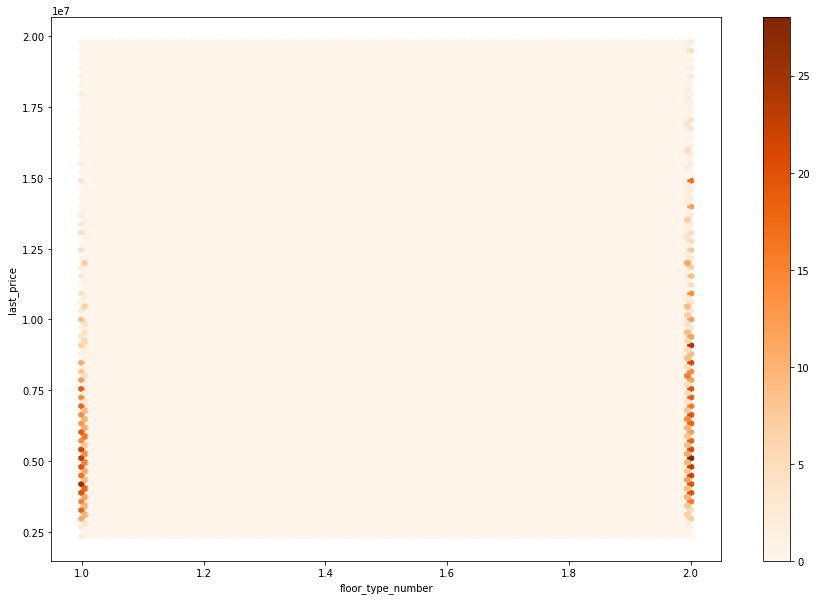

In [306]:
(
    data_center
    .query('floor_type_number != 0 and last_price < 0.2e8')
    .plot(x='floor_type_number', y='last_price', kind='hexbin', sharex=False, figsize=(15, 10), cmap='Oranges', alpha=1)
)

<AxesSubplot:xlabel='city_сenters_nearest', ylabel='last_price'>

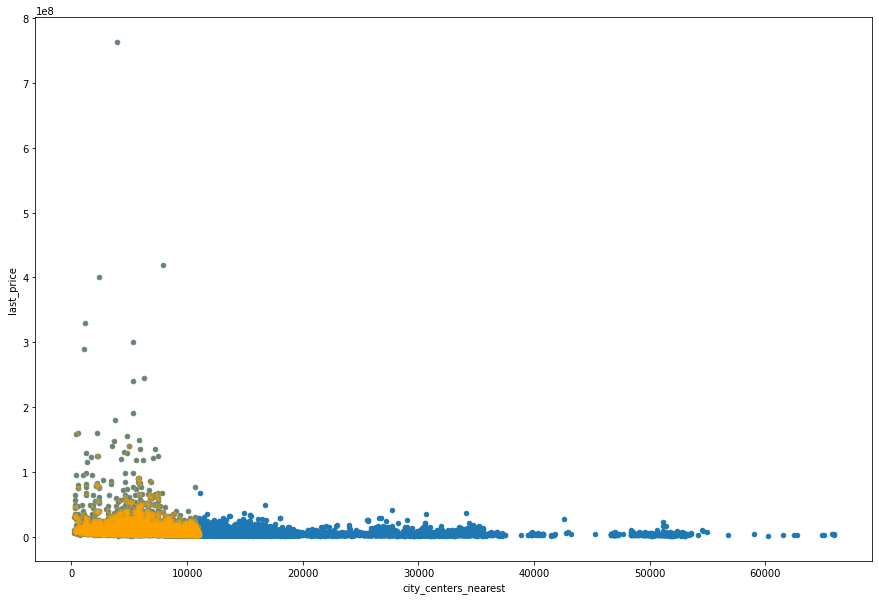

In [307]:
# Оценка корреляции цены квартиры с ее удаленностью от центра
ax = data.plot(x='city_сenters_nearest', y='last_price', kind='scatter', figsize=(15, 10))
data_center.plot(x='city_сenters_nearest', y='last_price', kind='scatter', figsize=(15, 10), ax=ax, color='orange', alpha=0.3)

<AxesSubplot:xlabel='exposition_day_of_week', ylabel='last_price'>

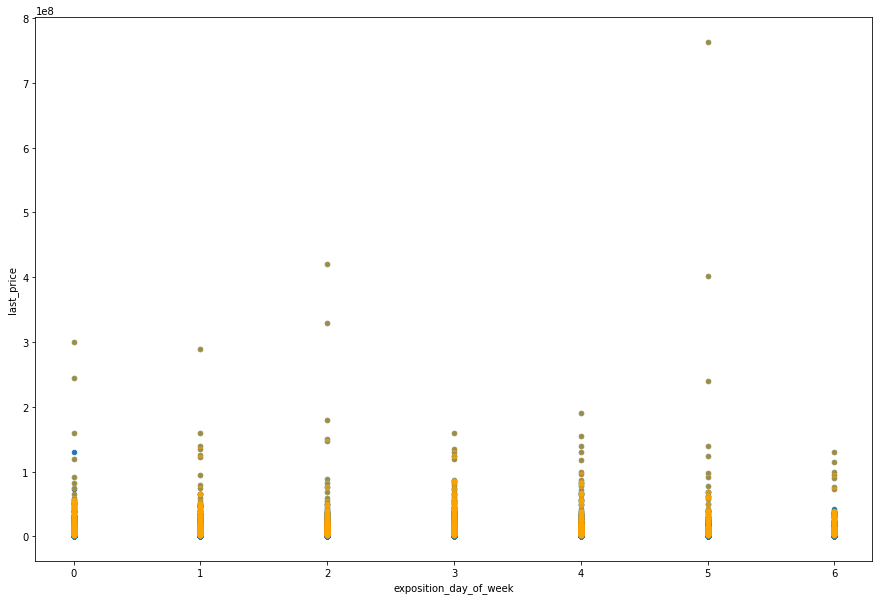

In [308]:
# Оценка корреляции цены квартиры с днем недели публикации объявления
ax = data.plot(x='exposition_day_of_week', y='last_price', kind='scatter', figsize=(15, 10))
data_center.plot(x='exposition_day_of_week', y='last_price', kind='scatter', figsize=(15, 10), ax=ax, color='orange', alpha=0.5)

<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

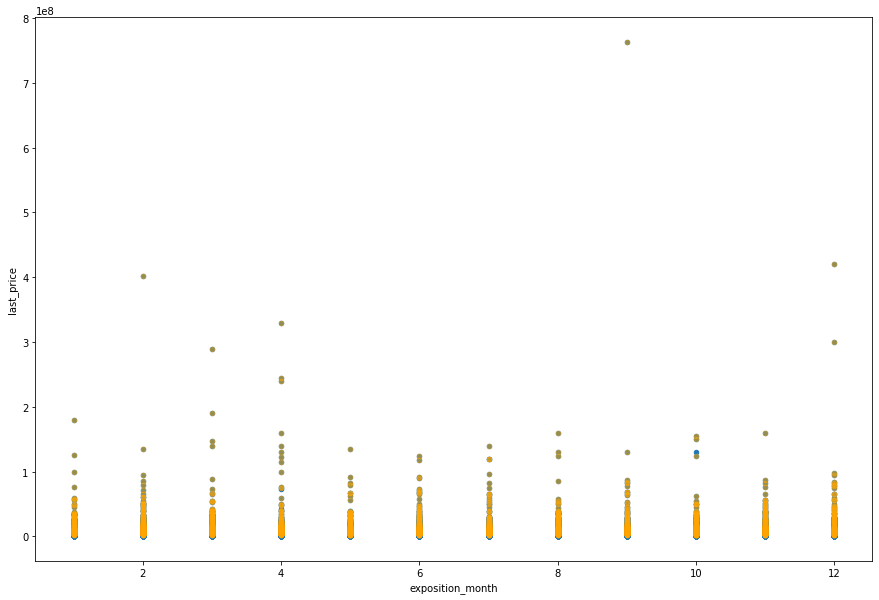

In [309]:
# Оценка корреляции цены квартиры с месяцем публикации объявления
ax = data.plot(x='exposition_month', y='last_price', kind='scatter', figsize=(15, 10))
data_center.plot(x='exposition_month', y='last_price', kind='scatter', figsize=(15, 10), ax=ax, color='orange', alpha=0.5)

<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

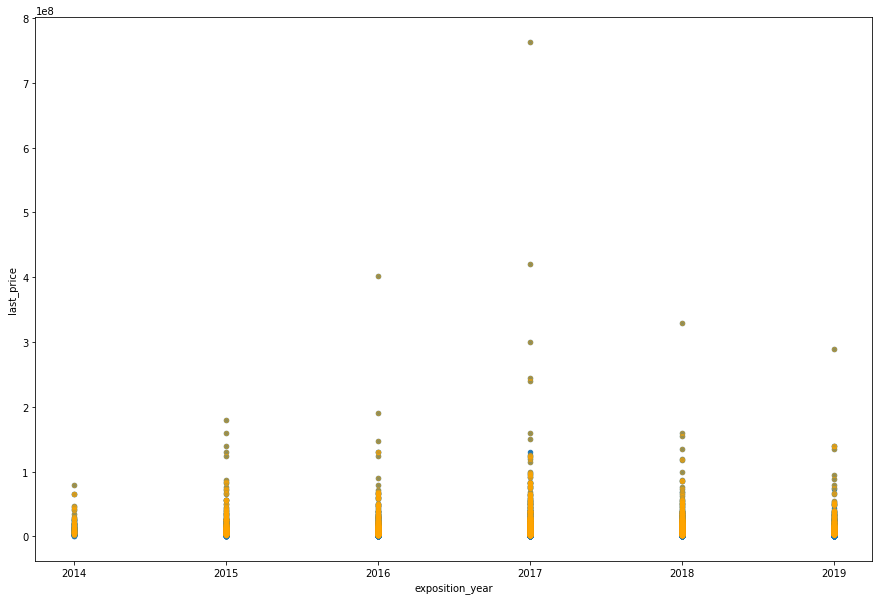

In [310]:
# Оценка корреляции цены квартиры с годом публикации объявления
ax = data.plot(x='exposition_year', y='last_price', kind='scatter', figsize=(15, 10))
data_center.plot(x='exposition_year', y='last_price', kind='scatter', figsize=(15, 10), ax=ax, color='orange', alpha=0.5)

### Выводы (шаг 4)

__Анализ площади, цены, числа комнат и высоты потолков__


Столбцы с общей, жилой и площадью кухни имеют практически Пуассоновское распределение. Это нормально, так как ожидаемо, что будет больше всего квартир с маленькой площадью, а с увеличением площади количество квартир будет уменьшатся. На гистограмме жилой площади отчетливо видны одно- и двухкомнатные квартиры, также можно увидеть трехкомнатные. Но гистограммах столбцов с общей площадью и площадью кухни также прослеживаются эти категории, но значительно мне выраженно.

Анализ цены квартир показал, что цены имеют практически нормальное распределение в области до 100 млн. и некоторый хвост, который растягивается вплоть до 800 млн. Это ожидаемое, так как существует огромный сегмент обычных квартир и небольшой сегмент элитного жилья. Также была обнаружена аномалия с ценой квартиры 12 тыс., которая явно не соответствует рынку. Аномалия была удалена.

Количество комнат имеет практически Пуассоновское распределение. Ожидаемо, что большинство квартир будет иметь от 1 до 3 комнат, а также существование элитного жилья.

Высота потолка имеет распределение, напоминающее Пуассоновское, но с выраженными всплесками в области 2.7 м и 3 м. Скорее всего, это объясняется типовой застройкой.

__Анализ времени продажи квартиры__

Время продажи квартиры имеет практически Пуассоновское распределение. Среднее и медиана равны 157.2 и 74, соответственно. Видно, что их значения очень отличаются. На гистограмме видны всплески около 45, 60 и 90 дней. Возможно, это обусловлено некими ограничениями сервиса, которые снимают объявление через 1.5, 2 или 3 месяца (возможно, в зависимости от тарифа), если его не продлить. Но данную гипотезу необходимо проверять у поставщика данных. Исходя из Пуассоновского распределения данных, достаточно трудно сделать вывод о сроках продажи квартиры, но исходя из диаграммы размах и статистических данных можно утверждать, что:
- в среднем квартиры продаются от 1.5 до 8 месяцев, наиболее часто около 3-4 месяцев;
- если квартиру удалось продать менее чем за 1.5 месяца - это очень хорошо;
- если квартиру не удается продать более года - это необычно долго.

__Удаление редких и выбивающихся значений__

В столбцах __total_images__, __rooms__, __floors_total__ и __airports_nearest__ были обнаружены выбивающиеся за рамки 1.5IRQ (усы диаграммы размаха) значения. Их доля от общего числа составлял менее 1%, поэтому они были удалены. Скорее всего, это аномалии, но, лучше уточнить данную информацию у поставщика данных.

Также подобные значения были обнаружены в столбцах __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __city_center_nearest__, __days_exposition__, __m2_price__, __living_total_area_ratio__ и __kitchen_total_area_ratio__. Они не были удалены по следующим причинам:
- __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __m2_price__, __kitchen_total_area_ration__ - распределение столбцов не является нормальным, а количество выбивающихся значений в этих столбцах достаточно велико (3-10%). Это объясняются наличием на рынке большого сильно различающихся квартир, которые сами по себе не являются аномалиями и их удаление повлечет потерю качества данных;
- __city_center_nearest__ - наличие аномалий объясняется некоторым количеством населенных пунктов удаленных от центра Санкт-Петербурга, которые по сути не являются аномалиями;
- __days_exposition__ - аномалии в данных объясняются кризисом 2014 года. Судя по данным, квартиры какое-то время практически не покупали. Со временем ситуация нормализовалась;
- __living_total_area_ratio__ - количество аномалий очень мало, а у столбца наблюдается нормальное распределение. Так как усы диаграммы размаха захватывают на все данные нормального распределения, аномалиями признаны нормальные данные.

__Исследование цены квартир__

Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни - эти значения тесно связаны с общей площадью квартиры) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально.

От числа комнат в квартире зависит ее максимальная цена - чем больше комнат, тем она выше. Та же ситуация наблюдается с зависимостью от этажа квартиры (первого или последнего) - максимальная цена квартиры на последнем этаже больше.

Также наблюдается зависимость, что у квартир более далеких от центра максимальная цена уменьшается.

От дня недели и месяца, в которые было подано объявление, цена квартиры не зависит. А из-за кризиса 2014 года максимальная цена на квартиры выросла, начиная с 2015 года.

Населенные пункты с наибольшим числом объявлений - Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, Гатчина, поселок Парголово, деревня Кудровои и Выборг. Средняя стоимость $м^2$ для каждого из населенных пунктов приведена выше в тетради. Средняя цена $м^2$ для всех этих пунктов - 83 тыс. Наибольшая стоимость $м^2$ в Зеленогорске - 117.5 тыс., наименьшая - в деревне Старополье - 11 тыс.

__Определение центра города__

По графику зависимости цены от удаленности от центра в Санкт-Петербурге видно, что центром города можно считать площадь, в радиусе 10 км от центра.


__Анализ квартир в центре города__

В среднем, площадь квартир в центре города на 20 $м^2$ больше, чем у всех квартир. Из гистограммы распределения видно, что с ростом площади квартиры, количество квартир не в центре города стремится к 0. Особенно это проявляется после площади 100 $м^2$.

Минимальная цена в центре города значительно выше - 1.8 млн в центре против 430 тыс. в общем. Средняя же цена отличается в 1.78 раз (в центре - 11.7 млн, в общем - 6.6 млн). Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0. Особенно это проявляется для квартир стоимостью более 10 млн.

Распределение количества комнат в центре города несколько отличается об общего - в центре города больше трехкомнатных квартир, чем однокомнатных, а в общем - наоборот. Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0 - практически все пятикомнатные и все шестикомнатные квартиры находятся в центре.

В среднем, высота потолка в центре не значительно отличается от всех квартир. Распределение квартир с высотой потолка менее 3 м в центре схоже с общим распределением, но начиная с 2.8 м практически все квартиры (кроме 3 м) находятся в центре.

Сравнение зависимости цены квартир от различных параметров показало, что разницы между всеми квартирами и квартирами в центре города с этой точки зрения нет. 

## Шаг 5. Общий вывод

К основным выводам, которые можно сделать после проведенной работы, можно отнести:
- В среднем квартиры продаются от 3-4 месяца, но гистограмма распределения продаж очень растянута и не стоит очень сильно ориентироваться на эту цифру;
- Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально;
- Максимальная цена зависит от количества комнат в квартире и ее удаленности от центра прям и обратно пропорционально, соответственно;
- В центре города (радиус около 10 км) цены на квартиры резко увеличиваются;
- Характер зависимости цены от различных параметров для квартир в центре и всех квартир не отличается.

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файл изучен (выведены первые строки, метод info())


- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему


- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей


- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"


- [x]  в каждом этапе есть выводы


- [x]  есть общий вывод